# ДЗ 2. Проверка гипотез

Имя, Фамилия: Вадим Палысаев

группа: 223

**Оценка(для проверяющего):** 0 из 32

**Дедлайн:** 24 ноября 23:59 (решение нужно сдать в энитаск)

# Введение. Несколько слов о шахматах

В этом домашнем задании вам будет представлен набор данных связанных с шахматами. Напомним, что шахматная партия может заканчиваться одним из трёх исходов:
- Победа белых (записывается как 1-0)
- Победа чёрных (записывается как 0-1)
- Ничейный исход (записывается как 1/2-1/2)

Также, в соревновательных шахматах есть временной контроль: партии делятся на несколько категорий, в зависимости от того, сколько времени оппонненты имеют на размышления:
- Блиц (до 10 минут на все ходы, возможно с добавлением времени после каждого хода)
- Рапид (от 10 до 30 минут на все ходы, возможно с добавлением времени после каждого хода)
- Классические или медленные шахматы (от 30 минут на все ходы, часто с добавлением времени после 40 и 60 ходов)

Для того чтобы как-то классифицировать силу игроков, была введена рейтинговая система ELO, на основании которой игрокам присуждается ранг (например международный мастер или гроссмейстер) и формируются турниры. Отметим что рейтинг ELO меняется, в зависимости от того, в каком формате временного контроля игрок участвует (т.е. у одного человека разный рейтинг для блица, рапида и классических шахмат).

В этом датасете собраны основные данные об шахматных партиях, сыгранными за период с 1980 по 2021 года.
- Представлены партии всех трех форматов, формат партии указан в поле ``control``
- Исход партии представлен в поле ``result``
- Рейтинги оппонентов записаны в полях ``elo_white`` и ``elo_black`` для рейтинга играющих за белых и за черных соответственно.  
    - Поле ``elo_average`` содержит среднее значение ``elo_white`` и ``elo_black`` -- _усредненный рейтинг (оппонентов)_.
    - Поле ``elo_difference`` содержит в себе значение ``elo_white - elo_black``.
- Поле ``opening`` содержит одно из пяти значений ``'A', 'B', 'C', 'D', 'E'``, которое кодирует информацию о нескольких первых ходах в партии (см. задачу 3 для деталей).
- В поле ``length`` записано число сделанных ходов в партии. Обратите внимание, что ход -- это движение одной фигуры со стороны белых **и** движение одной фигуры со стороны чёрных, т.е. за один ход и белые и черные совершают по действию.
- Поля ``date`` и ``site`` содержат информацию о том, в каком году была сыграна партия и место её проведения соответственно.

## Обзор данных (2 балла)
В этой секции вам предлагается познакомиться с данными. Посмотрите на три разных формата временного контроля. Сравните как в каждом из них
- Распределены исходы партий (победа белых/победа чёрных/ничья)
- Распределены усреднённые рейтинги оппонентов партий
- Распределены длительности партий

**Бонус (max 3 дополнительных балла)** При желании, можно также посмотреть другие вещи --- например как менялось количество партий по декадам или пятилеткам. Попробуйте обнаружить и _объяснить_ интересные и статистически значимые феномены.  

In [194]:
import numpy as np
import pandas as pd
pd.set_option('display.precision', 5)
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

In [195]:
games_df = pd.read_csv("games.csv")
games_df.head()

,result,control,elo_white,elo_black,elo_average,elo_difference,length,opening,date,site
0,1/2-1/2,slow,2380,2330,2355.0,50,25,C,1980,Prague
1,1/2-1/2,slow,2425,2545,2485.0,-120,104,E,1980,Prague
2,0-1,slow,2445,2410,2427.5,35,85,C,1980,Prague
3,0-1,slow,2435,2445,2440.0,-10,82,D,1980,Prague
4,1/2-1/2,slow,2410,2380,2395.0,30,16,A,1980,Prague


In [196]:
games_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5767540 entries, 0 to 5767539
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   result          object 
 1   control         object 
 2   elo_white       int64  
 3   elo_black       int64  
 4   elo_average     float64
 5   elo_difference  int64  
 6   length          int64  
 7   opening         object 
 8   date            int64  
 9   site            object 
dtypes: float64(1), int64(5), object(4)
memory usage: 440.0+ MB


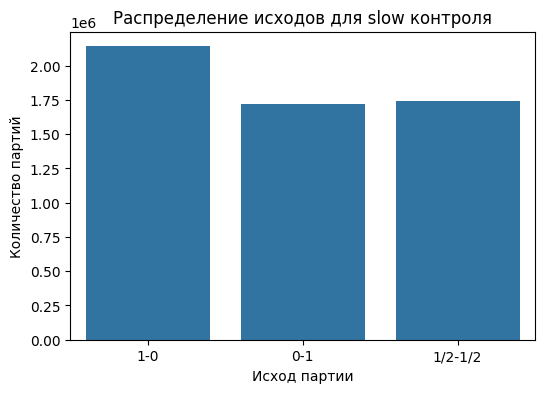

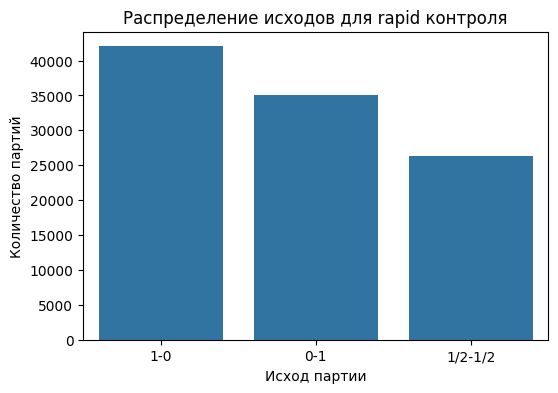

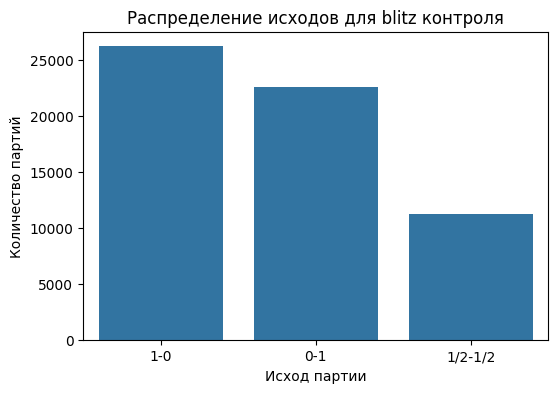

In [197]:

results_order = ['1-0', '0-1', '1/2-1/2']
controls = ['slow', 'rapid', 'blitz']

for control in controls:
    plt.figure(figsize=(6,4))
    sns.countplot(data=games_df[games_df['control'] == control], x='result', order=results_order)
    plt.title(f'Распределение исходов для {control} контроля')
    plt.xlabel('Исход партии')
    plt.ylabel('Количество партий')
    plt.show()

<ipython-input-198-57061a6a93c7>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=games_df[games_df['control'] == control], x='elo_average', shade=True)


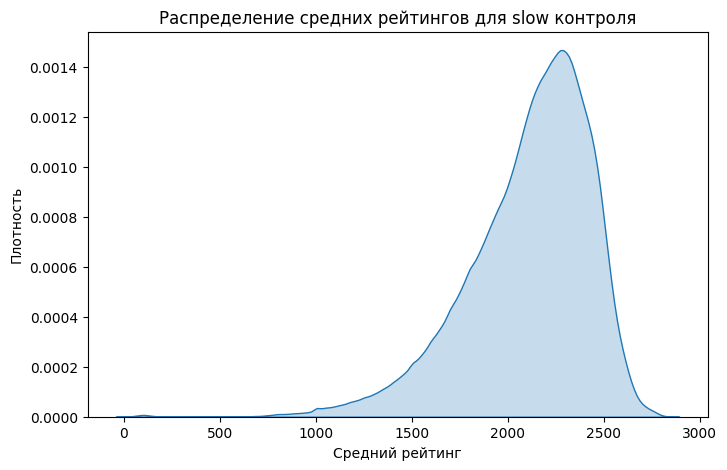

<ipython-input-198-57061a6a93c7>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=games_df[games_df['control'] == control], x='elo_average', shade=True)


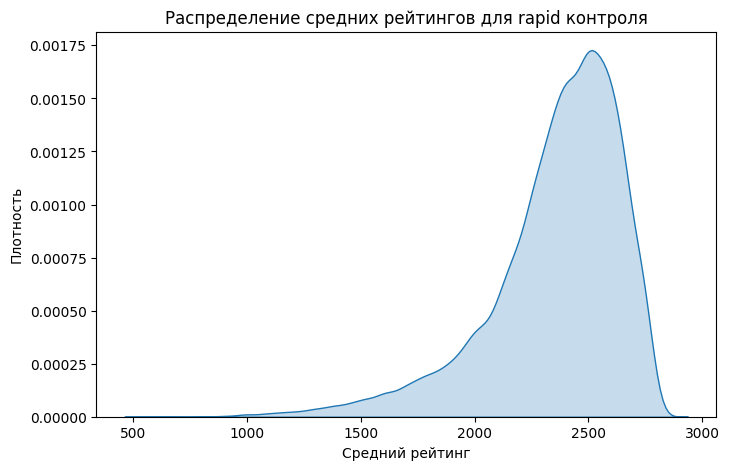

<ipython-input-198-57061a6a93c7>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=games_df[games_df['control'] == control], x='elo_average', shade=True)


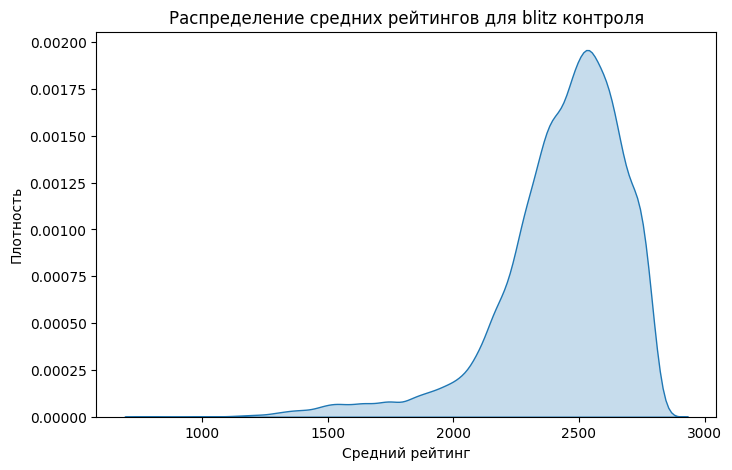

In [198]:
for control in controls:
    plt.figure(figsize=(8,5))
    sns.kdeplot(data=games_df[games_df['control'] == control], x='elo_average', shade=True)
    plt.title(f'Распределение средних рейтингов для {control} контроля')
    plt.xlabel('Средний рейтинг')
    plt.ylabel('Плотность')
    plt.show()

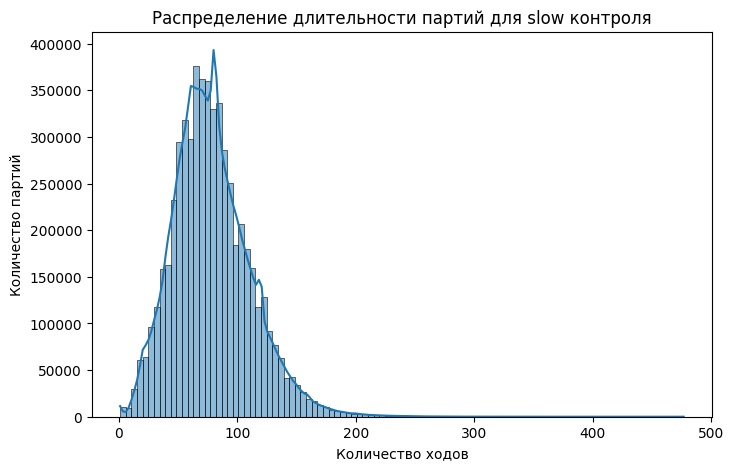

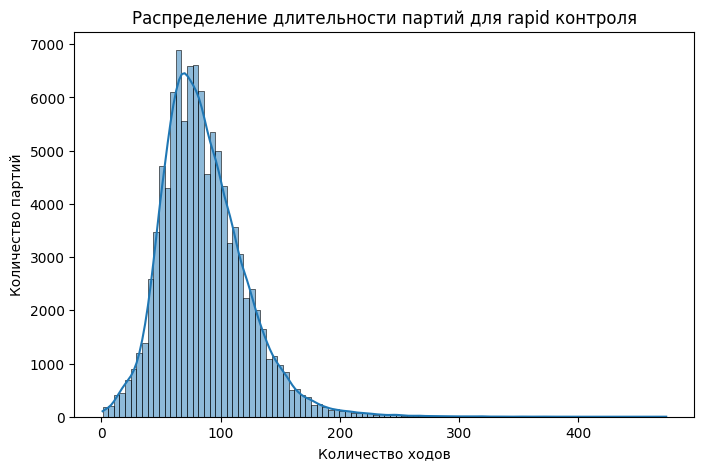

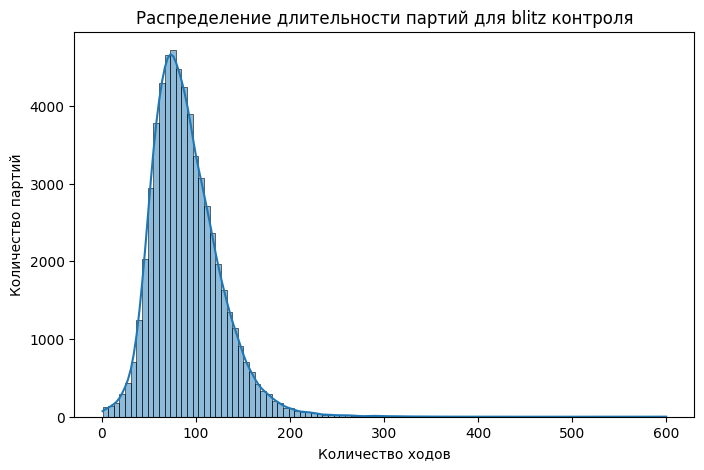

In [199]:
for control in controls:
    plt.figure(figsize=(8,5))
    sns.histplot(data=games_df[games_df['control'] == control], x='length', bins=100, kde=True)
    plt.title(f'Распределение длительности партий для {control} контроля')
    plt.xlabel('Количество ходов')
    plt.ylabel('Количество партий')
    plt.show()

###Бонус: Дополнительные интересные графики

Изменение количества партий по годам

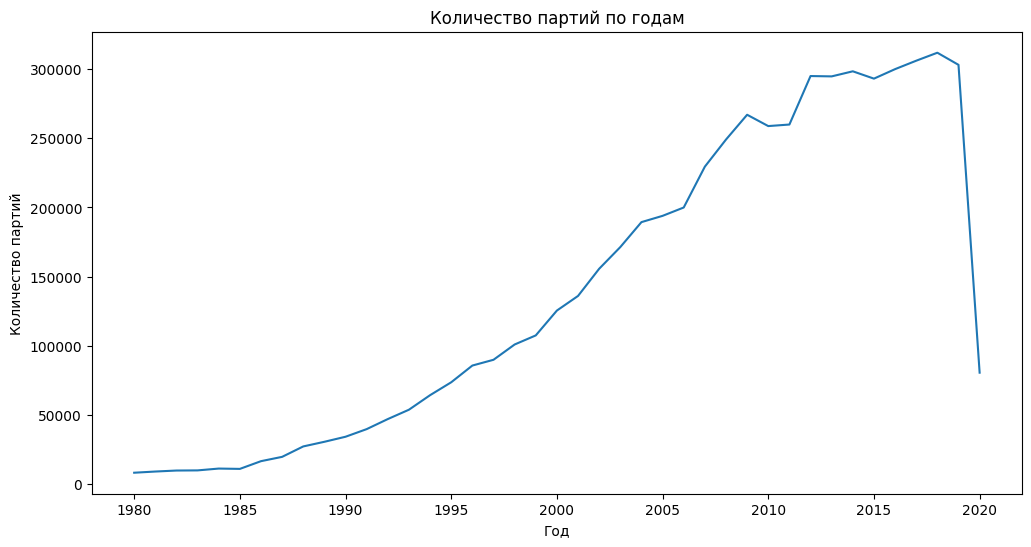

In [200]:
games_per_year = games_df.groupby('date').size()

plt.figure(figsize=(12,6))
sns.lineplot(x=games_per_year.index, y=games_per_year.values)
plt.title('Количество партий по годам')
plt.xlabel('Год')
plt.ylabel('Количество партий')
plt.show()

Распределение рейтингов по цвету фигур

<ipython-input-201-774b493b61d2>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=games_df, x='elo_white', label='Белые', shade=True)
<ipython-input-201-774b493b61d2>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=games_df, x='elo_black', label='Чёрные', shade=True)


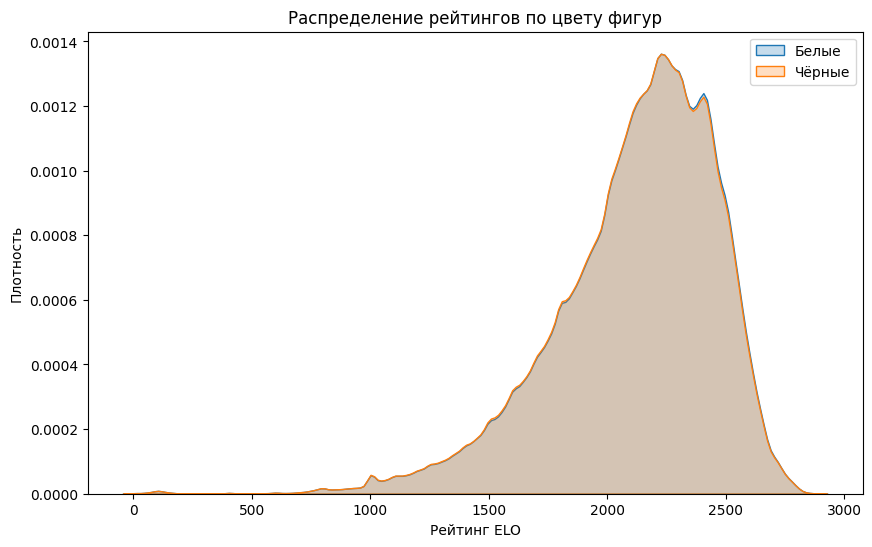

In [201]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=games_df, x='elo_white', label='Белые', shade=True)
sns.kdeplot(data=games_df, x='elo_black', label='Чёрные', shade=True)
plt.title('Распределение рейтингов по цвету фигур')
plt.xlabel('Рейтинг ELO')
plt.ylabel('Плотность')
plt.legend()
plt.show()

Влияние разницы рейтингов на исход партии

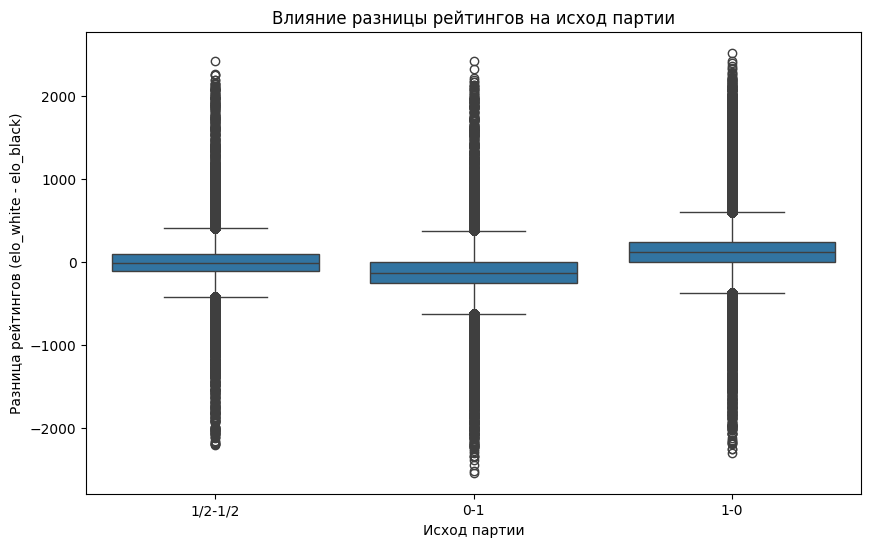

In [202]:
plt.figure(figsize=(10,6))
sns.boxplot(data=games_df, x='result', y='elo_difference')
plt.title('Влияние разницы рейтингов на исход партии')
plt.xlabel('Исход партии')
plt.ylabel('Разница рейтингов (elo_white - elo_black)')
plt.show()

С 1980-х годов число сыгранных шахматных партий стабильно росло. Это связано с популяризацией шахмат и появлением онлайн-платформ, таких как Chess.com. Однако в 2020–2021 годах количество партий резко упало, вероятно, из-за пандемии, когда офлайн-турниры приостановились.

Распределение рейтингов белых и черных практически одинаковое.

Чем выше рейтинг у одного из игроков, тем больше у него шансов на победу. Если рейтинги равны, чаще всего партия заканчивается ничьей. Это подтверждает, что рейтинг ELO хорошо отражает силу игроков.

Видно, что в разных временных форматах совершенно разное распределение исходов партий. Это указывает нам на то что надо завести три различных набора данных и работать с каждым по отдельности:

In [203]:
slow  = games_df[games_df["control"] == "slow"]
rapid = games_df[games_df["control"] == "rapid"]
blitz = games_df[games_df["control"] == "blitz"]

Постройте для каждого из контролей распределение усредненного рейтинга партий и длин партий.

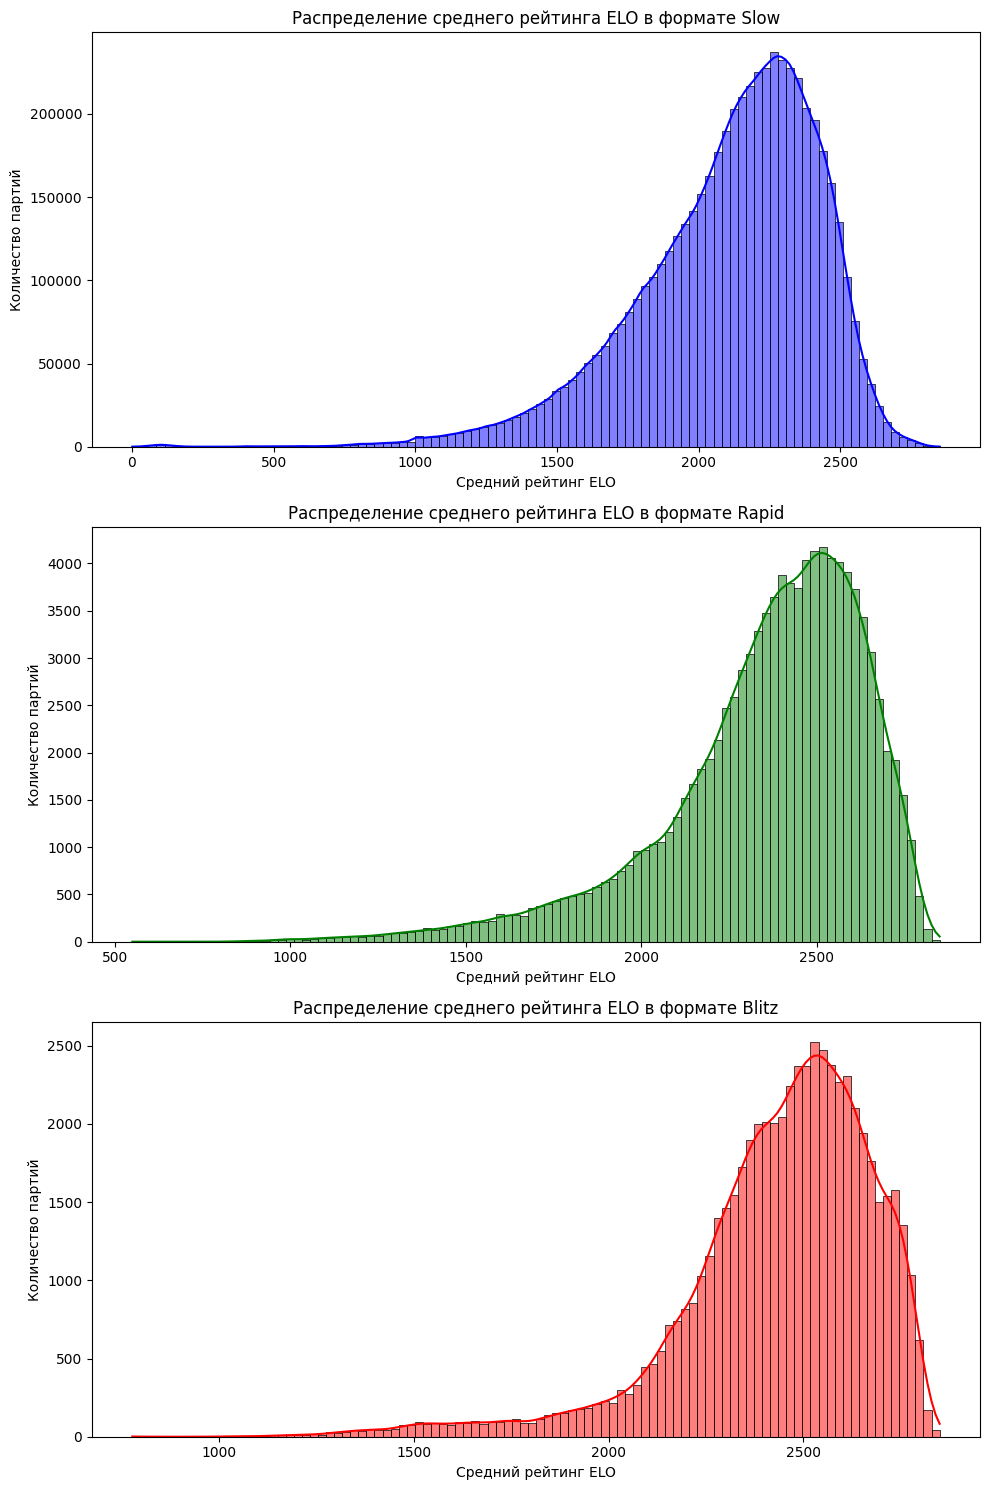

In [204]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

sns.histplot(slow['elo_average'], bins=100, kde=True, ax=axs[0], color='blue')
axs[0].set_xlabel('Средний рейтинг ELO')
axs[0].set_ylabel('Количество партий')
axs[0].set_title('Распределение среднего рейтинга ELO в формате Slow')

sns.histplot(rapid['elo_average'], bins=100, kde=True, ax=axs[1], color='green')
axs[1].set_xlabel('Средний рейтинг ELO')
axs[1].set_ylabel('Количество партий')
axs[1].set_title('Распределение среднего рейтинга ELO в формате Rapid')

sns.histplot(blitz['elo_average'], bins=100, kde=True, ax=axs[2], color='red')
axs[2].set_xlabel('Средний рейтинг ELO')
axs[2].set_ylabel('Количество партий')
axs[2].set_title('Распределение среднего рейтинга ELO в формате Blitz')

plt.tight_layout()
plt.show()

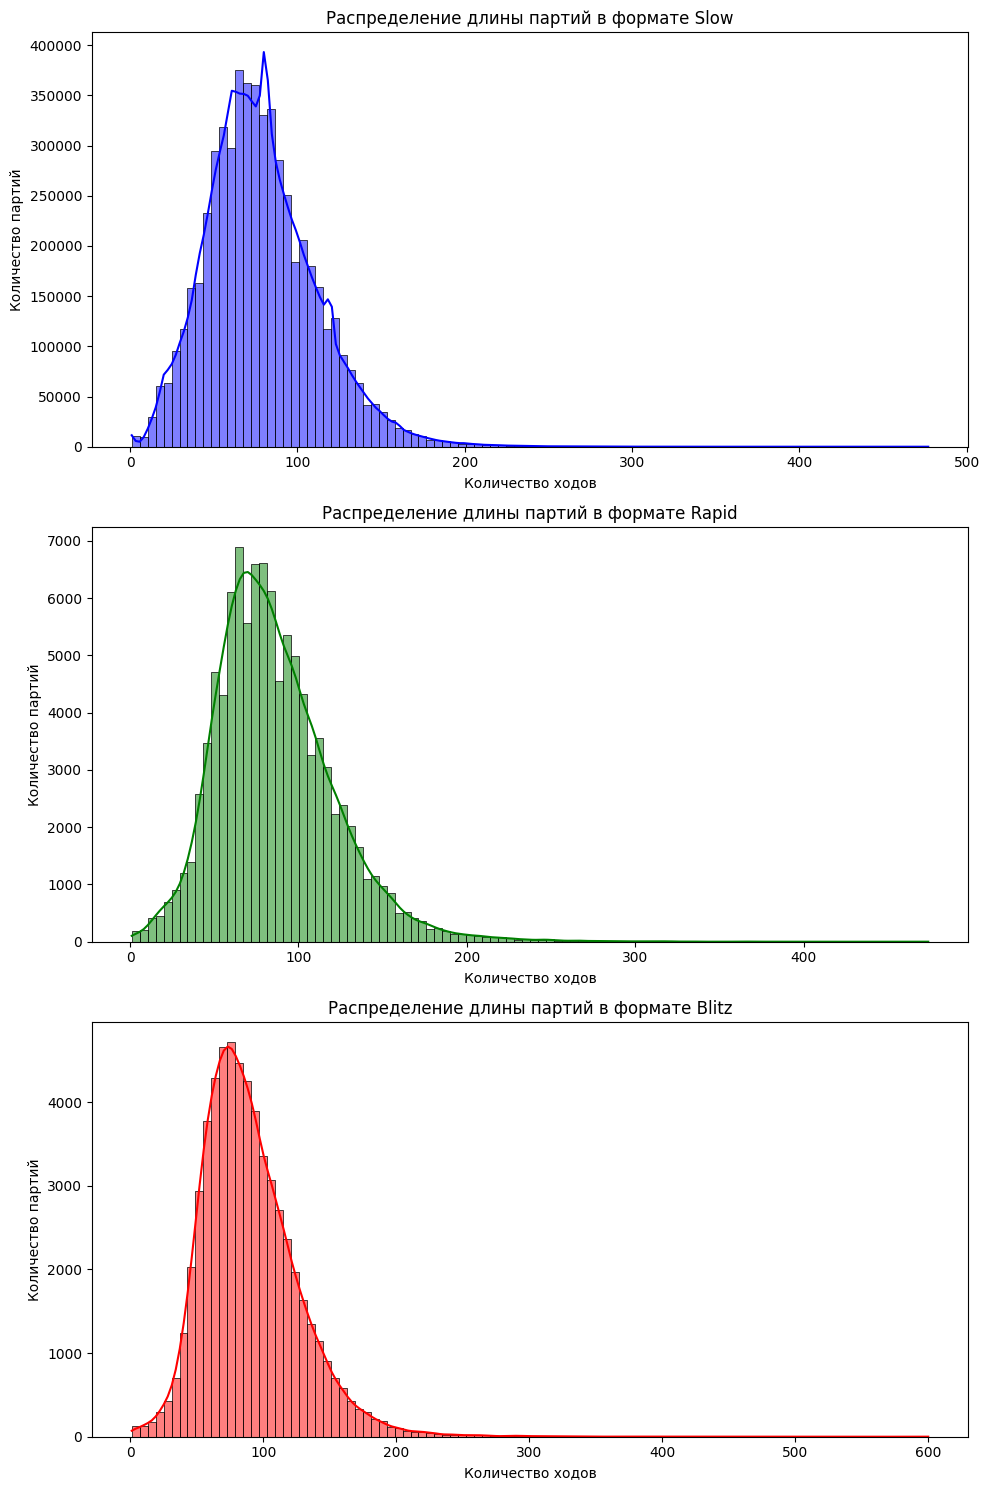

In [205]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

sns.histplot(slow['length'], bins=100, kde=True, ax=axs[0], color='blue')
axs[0].set_xlabel('Количество ходов')
axs[0].set_ylabel('Количество партий')
axs[0].set_title('Распределение длины партий в формате Slow')

sns.histplot(rapid['length'], bins=100, kde=True, ax=axs[1], color='green')
axs[1].set_xlabel('Количество ходов')
axs[1].set_ylabel('Количество партий')
axs[1].set_title('Распределение длины партий в формате Rapid')

sns.histplot(blitz['length'], bins=100, kde=True, ax=axs[2], color='red')
axs[2].set_xlabel('Количество ходов')
axs[2].set_ylabel('Количество партий')
axs[2].set_title('Распределение длины партий в формате Blitz')

plt.tight_layout()
plt.show()

# Задачи

## Разминка. Проверка гипотез о средних (5 баллов)

### Взгляд в прошлое. Рейтинг игр в Праге. (2 балла)
Пусть $X_1, \ldots, X_n \overset{\text{i.i.d}}{\sim} X$ --- выборка из некоторого распределения. Вспомните как строится асимптотический доверительный интервал для $\mathbb{E}[X]$, и, используя асимптотический z-test проверьте на уровне значимости $\alpha = 0.05$ гипотезу о том что математическое ожидание рейтинга партии равно 2389:
$$
    H_0 : \mathbb{E}[X] = 2389 \\
    H_1 : \mathbb{E}[X] \neq 2389
$$
для игр, сыгранных в Праге за период 1980-1989 г.

Мы рассматриваем только партии, сыгранные в Праге, и в диапазоне годов с 1980 по 1989 включительно. Это значит, что из таблицы нужно выбрать строки, где:

$$
\text{site} = "Prague"
$$

и

$$
\text{date} \in [1980, 1989].
$$

###Вычислим статистики

После фильтрации данных, мы вычисляем:

Среднее выборки $\bar{X}$, cтандартное отклонение выборки $S$, размер выборки $n$.

### Рассчитываем $z$-статистику

Формула для расчёта $z$-статистики:

$$
z = \frac{\bar{X} - \mu_0}{S / \sqrt{n}}
$$

Где:

- $\bar{X}$ — среднее значение выборки,
- $\mu_0 = 2389$ — гипотетическое среднее из нулевой гипотезы,
- $S$ — стандартное отклонение выборки,
- $n$ — размер выборки.

###Сравним с критическими значениями

Для уровня значимости $\alpha = 0.05$ критические значения $z_{\text{critical}}$ для двустороннего теста: $z_{\text{critical}} = \pm 1.96.$


###Принимаем или отвергаем нашу гипотезу

Если модуль $z$-статистики ($|z|$) больше $z_{\text{critical}}$, то мы находимся в области отклонения гипотезы, и нулевую гипотезу $H_0$ нужно отвергнуть.

Если $|z| \leq z_{\text{critical}}$, то у нас нет достаточных оснований для отклонения гипотезы $H_0$.


In [206]:
from numpy.typing import ArrayLike
from typing import Tuple, Optional, Literal
from scipy.stats import norm

hypothesis_side = Literal["both", "left", "right"]


class StatTestResult:
    """
    Wrapper that carries information about performed statistical test.

    Attributes
    ----------
    statistics : float
        value of the test's statistics.
    p_value : float
        obtained p-value for the test's statistics.
    significance : float
        significance level for the performed test
    critical_value : float
        critical value of the test's statistics for the given significance level
    test_name : str
        name of the test
    null_name: str
        formulation of the null hypothesis
    alternative_name : str
        formulation of the alternative hypothesis
    verdict:
        test's verdict
    """
    def __init__(self, statistics : float, p_value : float, significance : float, critical_value : float,\
                        test_name : str, null_name : str, alternative_name : str):
        self.statistics = statistics
        self.p_value = p_value
        self.significance = significance
        self.critical_value = critical_value
        self.name = test_name
        self.null = null_name
        self.alternative = alternative_name

        if self.p_value < self.significance:
            self.verdict = f"Отвергаем H0 при уровне значимости {significance}"
        else:
            self.verdict = f"Принимаем H0 при уровне значимости {significance}"

    def __repr__(self):
        return f"""
        {self.name}.
        H0: {self.null}
        H1: {self.alternative}
        ===================================
        Statistics value: {self.statistics}. Critical value: {self.critical_value}
        P-value: {self.p_value},
        Verdict: {self.verdict}
        """
    def __str__(self):
        return f"Statistics: {self.statistics}, P-value: {self.p_value}"

In [207]:
def z_test_one_sample(sample : ArrayLike, null_mean : float,
                      significance : float = 0.05, tail : hypothesis_side = 'both') -> StatTestResult:
    """
        Performs asymptotic z-test for the one sample

        Parameters
        ----------
        sample : ArrayLike
            sample on which z-test will be performed
        null_mean : float
            value of mean under null hypothesis.
        significance : float
            significance level for the performed test
        tail : Literal["both", "left", "right"]
            alternative side

        Returns
        -------
        res : StatTestResult
            An object containing infomration about test results
    """
    sample = np.array(sample)
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    n = len(sample)
    se = sample_std / np.sqrt(n)
    z_stat = (sample_mean - null_mean) / se

    if tail == 'both':
        z_critical = norm.ppf(1 - significance / 2)
        p_value = 2 * (1 - norm.cdf(abs(z_stat)))
        alternative = "not equal"
    elif tail == 'right':
        z_critical = norm.ppf(1 - significance)
        p_value = 1 - norm.cdf(z_stat)
        alternative = "greater"
    elif tail == 'left':
        z_critical = norm.ppf(significance)
        p_value = norm.cdf(z_stat)
        alternative = "less"
    else:
        raise ValueError("Error")

    test_name = "Asymptotic Z-Test for One Sample"
    null_name = f"E[X] = {null_mean}"
    alternative_name = alternative

    res = StatTestResult(statistics=z_stat, p_value=p_value, significance=significance,
                        critical_value=z_critical, test_name=test_name,
                        null_name=null_name, alternative_name=alternative_name)

    return res

In [208]:
prague_games = games_df[(games_df['site'] == 'Prague') & (games_df['date'].between(1980, 1989))]
sample = prague_games['elo_average'].dropna()
null_mean = 2389
significance = 0.05
tail = 'both'

test_res = z_test_one_sample(sample=sample, null_mean=null_mean,
                                significance=significance, tail=tail)

print(repr(test_res))


        Asymptotic Z-Test for One Sample.
        H0: E[X] = 2389
        H1: not equal
        Statistics value: 0.050294112520269385. Critical value: 1.959963984540054
        P-value: 0.9598880153624181,
        Verdict: Принимаем H0 при уровне значимости 0.05
        


**Заключение**: На основе анализа партиий, сыгранных в Праге в период с 1980 по 1989 годы, можно сделать вывод, что средний рейтинг партий практически совпадает с гипотетическим значением 2389. Мы проверяли гипотезу о том, что средний рейтинг за этот период равен 2389, и пришли к выводу, что мы принимаем эту гипотезу. Это может говорить о стабильности уровня игроков и рейтингов в этот промежуток времени.

Мы вычислили показатель z-статистики, равный 0.05. Это значение намного меньше критического значения 1.96, которое является границей для принятия или отклонения гипотезы при уровне значимости 5%. Также значение p-value = 0.96 показало, что вероятность получить такие результаты, если гипотеза верна, очень высока. Это подтверждает, что наши данные не противоречат заявленной гипотезе.

### Назад в будущее. Рейтинг игр в Москве. (3 балла)
После того как вы проверили эту гипотезу, проверьте гипотезу о том, что средний рейтинг классических партий проводимых в Москве в 2010-2019 годах выше, чем рейтинг в 2000-2009 годах. Вспомните как устроен z-тест для двух выборок и
1. сформулируйте нулевую гипотезу и альтернативу;
2. укажите статистику и её распределение при верной нулевой гипотезе;
3. реализуйте тест и проверьте гипотезу на уровне значимости 0.05;

### Сформулируйте нулевую гипотезу и альтернативу

Нулевая гипотеза ($H_0$): Средний рейтинг классических партий, проводимых в Москве в 2010–2019 годах, не выше рейтинга в 2000–2009 годах.

$$
H_0: \mathbb{E}[X_{2010-2019}] \leq \mathbb{E}[X_{2000-2009}]
$$

Альтернативная гипотеза ($H_1$): Средний рейтинг классических партий в Москве в 2010–2019 годах выше, чем в 2000–2009 годах.

$$
H_1: \mathbb{E}[X_{2010-2019}] > \mathbb{E}[X_{2000-2009}]
$$

### укажите статистику и её распределение при верной нулевой гипотезе

Для проверки гипотезы мы используем $z$-статистику для двух независимых выборок. Формула вычисления $z$-статистики:

$$
z = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
$$

где:
- $\bar{X}_1$ и $\bar{X}_2$ — выборочные средние для двух выборок (2010–2019 и 2000–2009 соответственно),
- $s_1^2$ и $s_2^2$ — выборочные дисперсии для двух выборок,
- $n_1$ и $n_2$ — размеры выборок.

При верной нулевой гипотезе, z-статистика распределена по стандартному нормальному распределению $N(0, 1)$.

### реализуйте тест и проверьте гипотезу на уровне значимости 0.05:

In [209]:
def z_test_two_sample(sample_x : ArrayLike, sample_y : ArrayLike, null_mean_diff : float = 0,
                      significance : float = 0.05, tail : hypothesis_side = 'both') -> StatTestResult:
    """
        Performs asymptotic z-test for the two samples

        Parameters
        ----------
        sample_x : ArrayLike
            first sample for the z-test
        sample_y : ArrayLike
            second sample for the z-test
        null_mean_diff : float
            differences of means under null hypothesis.
        significance : float
            significance level for the performed test
        tail : Literal["both", "left", "right"]
            alternative side

        Returns
        -------
        res : StatTestResult
            An object containing infomration about test results
    """

    sample_x = np.array(sample_x)
    sample_y = np.array(sample_y)

    mean_x = np.mean(sample_x)
    mean_y = np.mean(sample_y)

    std_x = np.std(sample_x, ddof=1)
    std_y = np.std(sample_y, ddof=1)

    n_x = len(sample_x)
    n_y = len(sample_y)

    se = np.sqrt((std_x**2) / n_x + (std_y**2) / n_y)

    z_stat = (mean_x - mean_y - null_mean_diff) / se

    if tail == 'both':
        z_critical = norm.ppf(1 - significance / 2)
        p_value = 2 * (1 - norm.cdf(abs(z_stat)))
        alternative = "not equal"
    elif tail == 'right':
        z_critical = norm.ppf(1 - significance)
        p_value = 1 - norm.cdf(z_stat)
        alternative = "greater"
    elif tail == 'left':
        z_critical = norm.ppf(significance)
        p_value = norm.cdf(z_stat)
        alternative = "less"
    else:
        raise ValueError("Error")

    test_name = "Asymptotic Z-Test for Two Independent Samples"
    null_name = f"mu1 - mu2 <= {null_mean_diff}"
    alternative_name = alternative

    res = StatTestResult(
        statistics=z_stat,
        p_value=p_value,
        significance=significance,
        critical_value=z_critical,
        test_name=test_name,
        null_name=null_name,
        alternative_name=alternative_name
    )

    return res

In [210]:
moscow_games_2000_2009 = games_df[
    (games_df['site'] == 'Moscow') &
    (games_df['date'].between(2000, 2009)) &
    (games_df['control'] == 'slow')
]

moscow_games_2010_2019 = games_df[
    (games_df['site'] == 'Moscow') &
    (games_df['date'].between(2010, 2019)) &
    (games_df['control'] == 'slow')
]

sample_2000_2009 = moscow_games_2000_2009['elo_average'].dropna()
sample_2010_2019 = moscow_games_2010_2019['elo_average'].dropna()
null_mean_diff = 0
significance = 0.05
tail = 'right'

test_result_moscow = z_test_two_sample(sample_x=sample_2010_2019,
                                       sample_y=sample_2000_2009,
                                       null_mean_diff=null_mean_diff,
                                       significance=significance,
                                       tail=tail
)

print(repr(test_result_moscow))


        Asymptotic Z-Test for Two Independent Samples.
        H0: mu1 - mu2 <= 0
        H1: greater
        Statistics value: -16.4572670706064. Critical value: 1.6448536269514722
        P-value: 1.0,
        Verdict: Принимаем H0 при уровне значимости 0.05
        


**Заключение**: Проведённый анализ показал, что средний рейтинг классических шахматных партий, проводимых в Москве в период с 2010 по 2019 годы, не выше среднего рейтинга за период с 2000 по 2009 годы. Нулевая гипотеза, согласно которой рейтинг в 2010–2019 годах не превышает рейтинг в 2000–2009 годах, не была отвергнута.

Результаты z-теста показали отрицательное значение статистики (-16.46), что сильно отклоняется от критического значения (1.64) в отрицательную сторону. Кроме того, p-value равно 1.0, что указывает на отсутствие статистически значимой разницы в пользу увеличения среднего рейтинга в 2010–2019 годах. Это означает, что в данных нет свидетельств в пользу роста среднего рейтинга в более поздний период.

Таким образом, на уровне значимости 0.05 мы не можем утверждать, что средний рейтинг классических партий в Москве за 2010–2019 годы выше, чем в 2000–2009 годах. Это может быть связано с тем, что уровень участников и качество соревнований в Москве оставались стабильными на протяжении этих двух десятилетий.

## Задача 1. Инфляция рейтинга (5 баллов)

В течение времени правила подсчета рейтинга менялись. Для сравнения возьмем партии в классическом временном контроле и их рейтинги за периоды 2000-2009 года и 2010-2019 год. Нарисуйте гистограммы, которые описывают распределение усредненных рейтингов оппонентов в партиях за эти периоды.

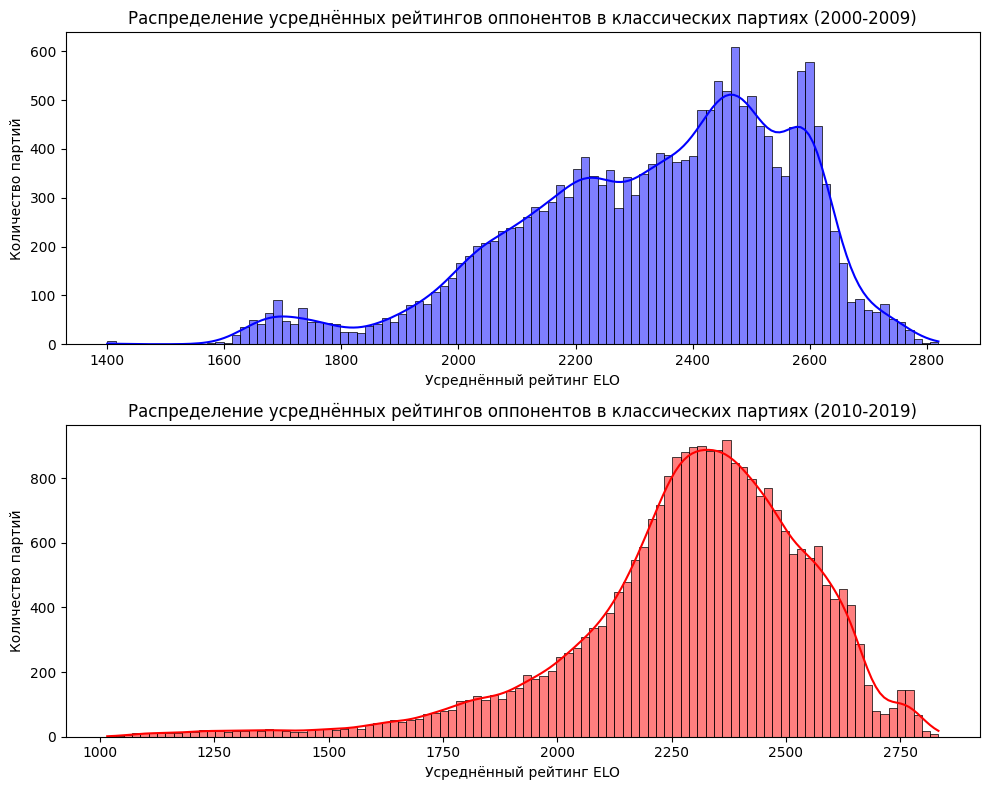

In [211]:
moscow_games_2000_2009 = games_df[
    (games_df['site'] == 'Moscow') &
    (games_df['control'] == 'slow') &
    (games_df['date'].between(2000, 2009))
]['elo_average'].dropna()

moscow_games_2010_2019 = games_df[
    (games_df['site'] == 'Moscow') &
    (games_df['control'] == 'slow') &
    (games_df['date'].between(2010, 2019))
]['elo_average'].dropna()

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

sns.histplot(moscow_games_2000_2009, bins=100, kde=True, ax=axs[0], color='blue')
axs[0].set_title('Распределение усреднённых рейтингов оппонентов в классических партиях (2000-2009)')
axs[0].set_xlabel('Усреднённый рейтинг ELO')
axs[0].set_ylabel('Количество партий')

sns.histplot(moscow_games_2010_2019, bins=100, kde=True, ax=axs[1], color='red')
axs[1].set_title('Распределение усреднённых рейтингов оппонентов в классических партиях (2010-2019)')
axs[1].set_xlabel('Усреднённый рейтинг ELO')
axs[1].set_ylabel('Количество партий')

plt.tight_layout()
plt.show()

Распространено мнение, что в силу изменений правил подсчета, высокий рейтинг стало получить легче --- произошла инфляция рейтинга. Проверьте, так ли это на самом деле, с помощью рангового критерия [Уилкоксона-Манна-Уитни](http://www.machinelearning.ru/wiki/index.php?title=Критерий_Уилкоксона-Манна-Уитни). В качестве распределения статистики можете брать подходящую аппроксимацию нормальным распределением с поправкой на повторяющиеся значения. Как и ранее,
1. сформулируйте нулевую гипотезу и альтернативу; объясните смысл математической формулировки нулевой гипотезы;
2. укажите статистику и её распределение при верной нулевой гипотезе;
3. реализуйте тест и проверьте гипотезу на уровне значимости 0.05;

###Формулировка гипотез
Нулевая гипотеза ($H_0$): Распределения усреднённых рейтингов оппонентов за периоды 2000–2009 и 2010–2019 одинаковы.

$$
P(X > Y) = 0.5
$$

где $X$ — рейтинг для периода 2010–2019, а $Y$ — для периода 2000–2009.

Альтернативная гипотеза ($H_1$): Рейтинг за 2010–2019 статистически ниже, чем за 2000–2009.

$$
P(X > Y) < 0.5
$$

###Статистика и её распределение
Критерий Манна-Уитни использует две статистики $U_1$ и $U_2$, связанные следующим свойством:

$$
U_1 + U_2 = n_1 n_2
$$

Для проверки гипотезы используется минимальная статистика:

$$
U = \min(U_1, U_2)
$$

При больших выборках минимальная статистика $U$ аппроксимируется нормальным распределением:

$$
U \sim N(\mu_U, \sigma_U^2)
$$

где:

$$
\mu_U = \frac{n_1 n_2}{2}, \quad \sigma_U = \sqrt{\frac{n_1 n_2 (n_1 + n_2 + 1)}{12}}
$$

### реализуйте тест и проверьте гипотезу на уровне значимости 0.05:

In [212]:
from scipy.stats import rankdata # this can help. See docs.
from collections import Counter

def mwu_test(sample_x : ArrayLike, sample_y : ArrayLike, significance : float = 0.05, tail : hypothesis_side = 'both') -> StatTestResult:
    """
        Performs Mann–Whitney U-test with correct support for ties in the data.
        REMARK: Test uses normal approximation for the distribution of test statistics
                under null hypothesis.

        Parameters
        ----------
        sample_x : ArrayLike
            first sample for the U-test
        sample_y : ArrayLike
            second sample for the U-test
        significance : float
            significance level for the performed test
        tail : Literal["both", "left", "right"]
            alternative side

        Returns
        -------
        res : StatTestResult
            An object containing infomration about test results
    """

    sample_x = np.array(sample_x)
    sample_y = np.array(sample_y)
    n1 = len(sample_x)
    n2 = len(sample_y)

    all_samples = np.concatenate([sample_x, sample_y])
    ranks = rankdata(all_samples, method='average')

    R1 = np.sum(ranks[:n1])
    R2 = np.sum(ranks[n1:])

    U1 = R1 - n1 * (n1 + 1) / 2
    U2 = R2 - n2 * (n2 + 1) / 2

    U = min(U1, U2)
    mu_U = n1 * n2 / 2.0

    rank_counts = Counter(ranks)
    tie_counts = [count for count in rank_counts.values() if count > 1]
    s = sum([t**3 - t for t in tie_counts])

    sigma_U = np.sqrt((n1 * n2 * (n1 + n2 + 1)) / 12.0 - (n1 * n2 * s) / (12.0 * (n1 + n2) * (n1 + n2 - 1)))

    if tail == "left":
        z = (U - mu_U - 0.5) / sigma_U
    elif tail == "right":
        z = (U - mu_U + 0.5) / sigma_U
    else:
        z = (U - mu_U) / sigma_U

    if tail == "both":
        p_value = 2 * (1 - norm.cdf(abs(z)))
        z_critical = norm.ppf(1 - significance / 2)
        alternative = "не равно"
    elif tail == "right":
        p_value = 1 - norm.cdf(z)
        z_critical = norm.ppf(1 - significance)
        alternative = "больше"
    elif tail == "left":
        p_value = norm.cdf(z)
        z_critical = norm.ppf(significance)
        alternative = "меньше"
    else:
        raise ValueError("Параметр tail должен быть 'both', 'left' или 'right'.")

    test_name = "Критерий Манна-Уитни"
    null_name = "P(X > Y) = 0.5"
    if tail == "left":
        alternative_name = "P(X > Y) < 0.5"
    elif tail == "right":
        alternative_name = "P(X > Y) > 0.5"
    else:
        alternative_name = "P(X > Y) != 0.5"

    res = StatTestResult(
        statistics=z,
        p_value=p_value,
        significance=significance,
        critical_value=z_critical,
        test_name=test_name,
        null_name=null_name,
        alternative_name=alternative_name
    )
    return res

In [213]:
data_x = games_df[
    (games_df['date'].between(2010, 2019)) &
    (games_df['control'] == 'slow')
]['elo_average'].dropna().to_numpy()

data_y = games_df[
    (games_df['date'].between(2000, 2009)) &
    (games_df['control'] == 'slow')
]['elo_average'].dropna().to_numpy()

test_result_mwu = mwu_test(data_x, data_y, significance=0.05, tail='left')

print(repr(test_result_mwu))


        Критерий Манна-Уитни.
        H0: P(X > Y) = 0.5
        H1: P(X > Y) < 0.5
        Statistics value: -320.95335492959003. Critical value: -1.6448536269514729
        P-value: 0.0,
        Verdict: Отвергаем H0 при уровне значимости 0.05
        


**Заключение**: Результаты теста Манна-Уитни с p-значением 0.0 позволяют отвергнуть нулевую гипотезу и утверждать, что рейтинг в период 2010–2019 статистически ниже, чем в 2000–2009. Это подтверждает гипотезу об инфляции рейтинга.

## Задача 2. Рейтинги и исход партий (7.5 баллов)

Исследуйте как, в зависимости от рейтинга участников, меняется распределение исхода партии. Мы предлагаем вам изучить как
- Разница в рейтинге влияет на шансы на результативный исход (победа одной из сторон)
- С ростом среднего рейтинга участников меняются шансы на победу

### Разрыв рейтинга и шансы на победу (5 баллов)

Нарисуйте гистограммы, показывающее как устроены исходы партий в зависимости от разницы в рейтинге для партий в разных формах временного контролля.

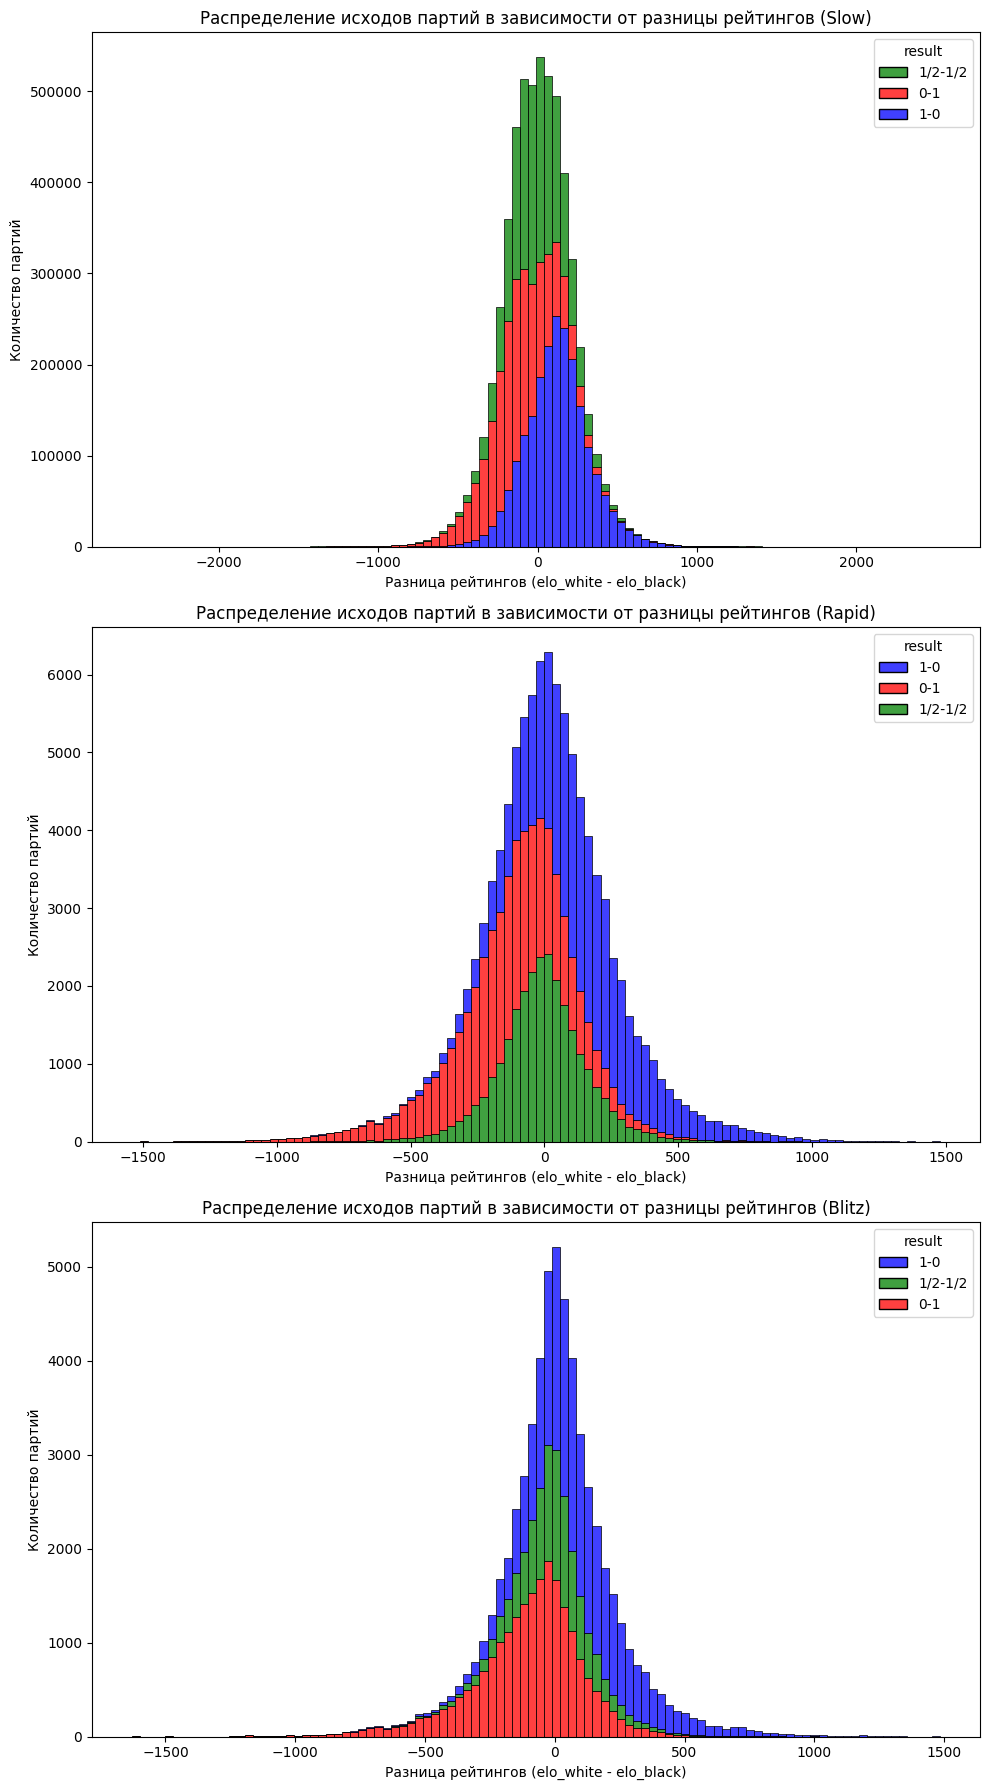

In [214]:
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

controls = ['slow', 'rapid', 'blitz']
titles = [
    "Распределение исходов партий в зависимости от разницы рейтингов (Slow)",
    "Распределение исходов партий в зависимости от разницы рейтингов (Rapid)",
    "Распределение исходов партий в зависимости от разницы рейтингов (Blitz)"
]
colors = ['blue', 'green', 'red']

for ax, control, title, color in zip(axs, controls, titles, colors):
    subset = games_df[games_df['control'] == control]
    sns.histplot(
        data=subset,
        x='elo_difference',
        hue='result',
        multiple='stack',
        bins=100,
        palette={'1-0': 'blue', '0-1': 'red', '1/2-1/2': 'green'},
        ax=ax
    )
    ax.set_title(title)
    ax.set_xlabel('Разница рейтингов (elo_white - elo_black)')
    ax.set_ylabel('Количество партий')

plt.tight_layout()
plt.show()

Проверьте гипотезу "симметрии":
> Правда ли что шансы победы белых при разрыве рейтинга между участниками в $X$ пунктов такие же, как шансы на победу чёрных при разрыве рейтинга в $-X$ пунктов?

Для проверки такой гипотезы будем использовать критерий $\chi^2$ для проверки независимости факторов.
- Подумайте, как должна выглядеть факторная таблица в этом случае?
- Сформулируйте как интерпретировать нулевую гипотезу критерия $\chi^2$ в контексте проверяемой нами гипотезы.
- Реализуйте проверку гипотезы.

# Гипотеза

Шансы победы белых при разрыве рейтинга $X$ пунктов такие же, как шансы на победу чёрных при разрыве рейтинга $-X$ пунктов.

# 1. Факторная таблица

Для проверки гипотезы симметрии мы можем построить факторную таблицу, которая сравнивает результаты игр (победа белых, победа чёрных, ничья) при положительном и отрицательном разрывах рейтинга ($X$ и $-X$).

$$
\begin{array}{|c|c|c|c|}
\hline
\text{Разрыв рейтинга} & \text{Победа белых} & \text{Победа чёрных} & \text{Ничья} \\
\hline
X > 0 & N_{W+} & N_{B+} & N_{D+} \\
\hline
X < 0 & N_{W-} & N_{B-} & N_{D-} \\
\hline
\end{array}
$$

- $N_{W+}$: число побед белых при $X > 0$,
- $N_{B+}$: число побед чёрных при $X > 0$,
- $N_{D+}$: число ничьих при $X > 0$,
- $N_{W-}$: число побед белых при $X < 0$,
- $N_{B-}$: число побед чёрных при $X < 0$,
- $N_{D-}$: число ничьих при $X < 0$.

# 2. Нулевая гипотеза и интерпретация

**Нулевая гипотеза ($H_0$):** Результаты игр (победа белых, победа чёрных, ничья) не зависят от знака разрыва рейтинга ($X > 0$ или $X < 0$).

$$
H_0: \text{распределение исходов одинаково для } X > 0 \text{ и } X < 0.
$$

**Альтернативная гипотеза ($H_1$):** Распределение исходов зависит от знака разрыва рейтинга.

$$
H_1: \text{распределение исходов различается для } X > 0 \text{ и } X < 0.
$$

Для проверки гипотезы используем критерий $\chi^2$ для проверки независимости.


In [215]:
import numpy as np
from scipy.stats import chi2

def chi2_contingency(observed : ArrayLike, significance : float = 0.05) -> StatTestResult:
    """
        Performs chi-square independence test test for contingency table

        Parameters
        ----------
        observed : ArrayLike
            contingency tablefor the test
        significance : float
            significance level for the performed test

        Returns
        -------
        res : StatTestResult
            An object containing infomration about test results
    """

    n = np.sum(observed)
    m, k = observed.shape
    expected = np.zeros((m, k))
    for i in range(m):
        for j in range(k):
            expected[i, j] = np.sum(observed[i]) * np.sum(observed[:, j]) / n

    T = 0
    for i in range(m):
        for j in range(k):
            T += (observed[i, j] - expected[i, j]) ** 2 / expected[i, j]

    df = (m - 1) * (k - 1)

    critical_value = chi2.ppf(1 - significance, df)
    p_value = 1 - chi2.cdf(T, df)

    test_name = "Chi-squared Contingency Test"
    null_hypothesis = "Results are independent of rating difference sign"
    alternative_hypothesis = "Results depend on rating difference sign"

    return StatTestResult(
        statistics=T,
        p_value=p_value,
        significance=significance,
        critical_value=critical_value,
        test_name=test_name,
        null_name=null_hypothesis,
        alternative_name=alternative_hypothesis,
    )

Проверьте сформулированную выше гипотезу для ваших данных:

In [216]:
filtered_df = games_df[games_df["result"] != "1/2-1/2"]

filtered_df["elo_difference"] = np.where(
    filtered_df["result"] == "0-1",
    -filtered_df["elo_difference"],
    filtered_df["elo_difference"]
)

grouped = filtered_df.groupby(["result", "elo_difference"]).size().reset_index(name="len")

pivot_table = grouped.pivot(index="result", columns="elo_difference", values="len").fillna(0)

observed = pivot_table.to_numpy(dtype=int)

result = chi2_contingency(observed)

print("Результаты критерия X^2:")
print(repr(result))

<ipython-input-216-e584ef224b52>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["elo_difference"] = np.where(


Результаты критерия X^2:

        Chi-squared Contingency Test.
        H0: Results are independent of rating difference sign
        H1: Results depend on rating difference sign
        Statistics value: 6529.404468885015. Critical value: 3472.502967157472
        P-value: 0.0,
        Verdict: Отвергаем H0 при уровне значимости 0.05
        


**Заключение**: Мы проверили гипотезу о том, что знак разрыва рейтинга (X>0 или X<0) не влияет на распределение исходов партий (победа белых, победа чёрных, ничья).

Результаты критерия X^2 показали:

Значение статистики: 6529.40
Критическое значение: 3472.50
p-value: 0.0.
Так как значение статистики намного превышает критическое значение, а
p-value меньше уровня значимости 0.05, мы отвергли нулевую гипотезу. Это значит, что шансы на победу действительно зависят от того, кто имеет преимущество в рейтинге — белые или чёрные.

### Средний рейтинг и распределение исходов (2.5 балла)
Существует распространеное мнение, что чем выше рейтинг участников партии, тем более вероятно, что итогом партии станет ничья. Постройте гистограммы показывающее как устроены исходы партий в зависимости от рейтинга партии (``elo_average``) для партий в разных формах временного контролля.

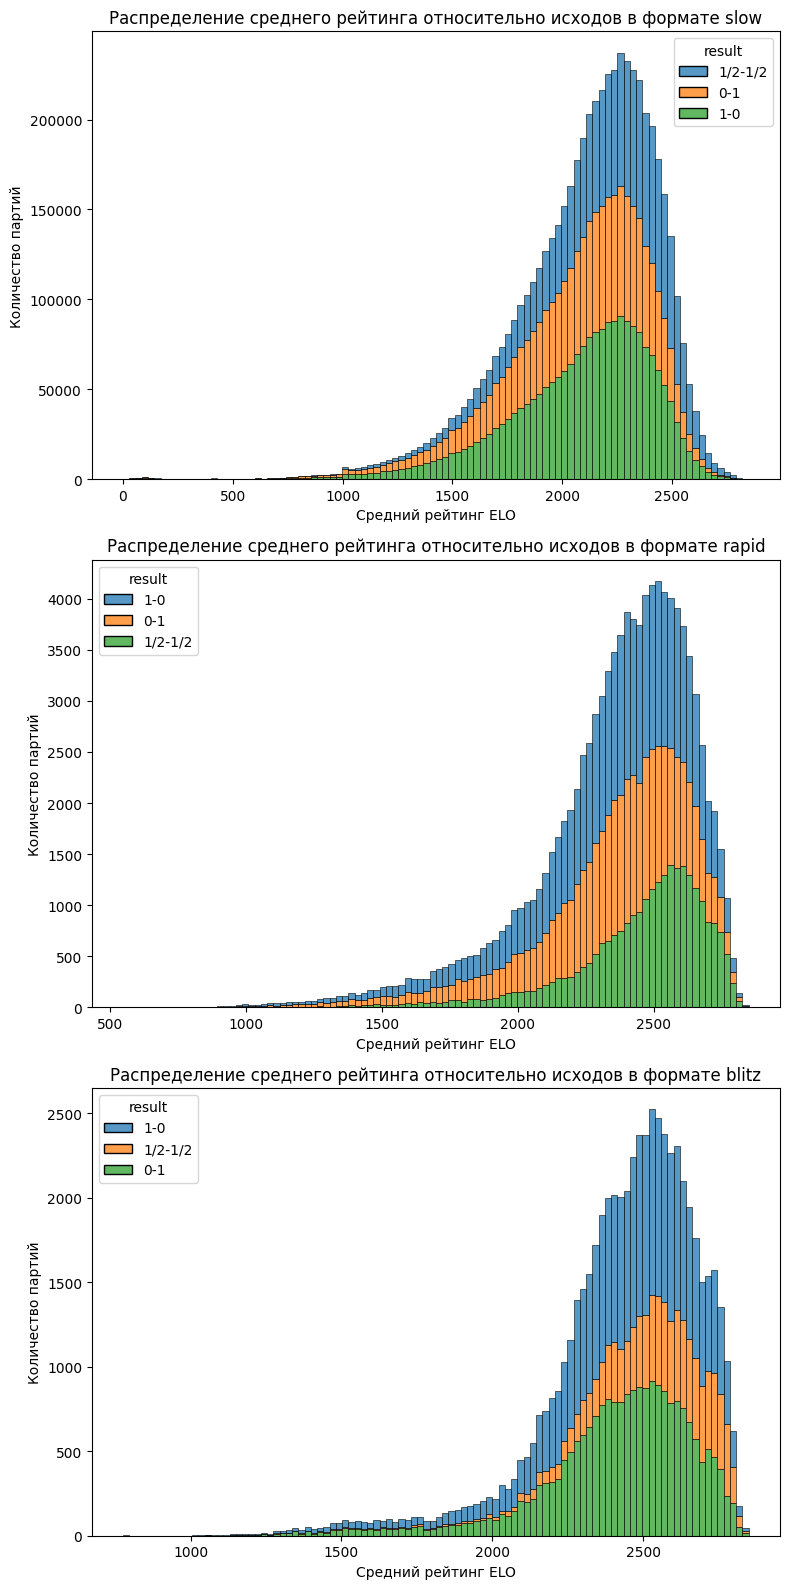

In [217]:
slow_games = games_df[games_df['control'] == 'slow']
rapid_games = games_df[games_df['control'] == 'rapid']
blitz_games = games_df[games_df['control'] == 'blitz']

fig, axs = plt.subplots(3, 1, figsize=(8, 16))

sns.histplot(data=slow_games, x='elo_average', hue='result', bins=100, kde=False, multiple="stack", ax=axs[0])
axs[0].set_title("Распределение среднего рейтинга относительно исходов в формате slow")
axs[0].set_xlabel("Средний рейтинг ELO")
axs[0].set_ylabel("Количество партий")

sns.histplot(data=rapid_games, x='elo_average', hue='result', bins=100, kde=False, multiple="stack", ax=axs[1])
axs[1].set_title("Распределение среднего рейтинга относительно исходов в формате rapid")
axs[1].set_xlabel("Средний рейтинг ELO")
axs[1].set_ylabel("Количество партий")

sns.histplot(data=blitz_games, x='elo_average', hue='result', bins=100, kde=False, multiple="stack", ax=axs[2])
axs[2].set_title("Распределение среднего рейтинга относительно исходов в формате blitz")
axs[2].set_xlabel("Средний рейтинг ELO")
axs[2].set_ylabel("Количество партий")

plt.tight_layout()
plt.show()

Согласно ChessBase, игроков можно условно делить на следующие категории, в зависимости от их рейтинга:
- 0-1000 Begginer
- 1000-1600 Average club player level
- 1600-2100 Strong club player level
- 2100-2300 International league player
- 2300-2450 International Master (IM) level
- 2450-2650 Grandmaster (GM) level
- \> 2650 Supergrandmaster, world champion level

Вместо игроков, мы будем брать усредненный рейтинг оппонентов в партии и применять классификацию выше. С помощью статистических методов, проверьте влияет ли класс партии на распределение исходов. Используйте уже знакомый вам тест $\chi^2$.
- Подумайте, как должна выглядеть факторная таблица в этом случае?
- Сформулируйте как интерпретировать нулевую гипотезу критерия $\chi^2$ в контексте проверяемой нами гипотезы.
- Реализуйте проверку гипотезы.

Подготовка данных:

Определим диапазоны рейтингов (bins) и соответствующие им категории (labels) согласно приведённой классификации.
Разделим данные на форматы временного контроля: slow, rapid, blitz.
Создадим новую колонку в данных, указывающую категорию среднего рейтинга партии.

Формирование факторной таблицы:

Для каждого формата временного контроля создадим таблицу, показывающую, как исход партии зависит от класса рейтинга.
Проверка гипотезы с помощью критерия X^2:

Нулевая гипотеза (H0): Распределение исходов партии не зависит от класса среднего рейтинга.
Альтернативная гипотеза (HA): Распределение исходов партии зависит от класса среднего рейтинга.
Выполним тест для каждого формата временного контроля.
Вывод и интерпретация результатов.

In [218]:
bins = [0, 1000, 1600, 2100, 2300, 2450, 2650, 3000]
labels = ['Begginer', 'Average', 'Strong', 'International', 'IM', 'GM', 'SuperGM']

games_copy = games_df.copy()
games_copy['elo_category'] = pd.cut(games_copy['elo_average'], bins=bins, labels=labels)

slow_games = games_copy[games_copy['control'] == 'slow']
rapid_games = games_copy[games_copy['control'] == 'rapid']
blitz_games = games_copy[games_copy['control'] == 'blitz']

table_slow = pd.crosstab(slow_games['elo_category'], slow_games['result'])
table_rapid = pd.crosstab(rapid_games['elo_category'], rapid_games['result'])
table_blitz = pd.crosstab(blitz_games['elo_category'], blitz_games['result'])

observed_slow = table_slow.to_numpy()
observed_rapid = table_rapid.to_numpy()
observed_blitz = table_blitz.to_numpy()
chi2_slow = chi2_contingency(observed_slow)
chi2_rapid = chi2_contingency(observed_rapid)
chi2_blitz = chi2_contingency(observed_blitz)

In [219]:
print("Факторная таблица для slow:")
print(table_slow)
print(repr(chi2_slow))

Факторная таблица для slow:
result            0-1     1-0  1/2-1/2
elo_category                          
Begginer        11453   12649     3678
Average        149286  168174    73978
Strong         653120  773904   492760
International  480338  596831   468887
IM             299672  394897   396407
GM             123205  185091   282445
SuperGM          5343    9744    22175

        Chi-squared Contingency Test.
        H0: Results are independent of rating difference sign
        H1: Results depend on rating difference sign
        Statistics value: 168050.21602826327. Critical value: 21.02606981748307
        P-value: 0.0,
        Verdict: Отвергаем H0 при уровне значимости 0.05
        


In [220]:
print("Факторная таблица для rapid:")
print(table_rapid)
print(repr(chi2_rapid))

Факторная таблица для rapid:
result           0-1    1-0  1/2-1/2
elo_category                        
Begginer          46     54        5
Average         1171   1254      332
Strong          5332   6181     2069
International   7065   8073     2998
IM              8451   9746     4967
GM             10196  12724    10922
SuperGM         2798   4000     5072

        Chi-squared Contingency Test.
        H0: Results are independent of rating difference sign
        H1: Results depend on rating difference sign
        Statistics value: 4760.244792622887. Critical value: 21.02606981748307
        P-value: 0.0,
        Verdict: Отвергаем H0 при уровне значимости 0.05
        


In [221]:
print("Факторная таблица для blitz:")
print(table_blitz)
print(repr(chi2_blitz))

Факторная таблица для blitz:
result          0-1   1-0  1/2-1/2
elo_category                      
Begginer          1     4        0
Average         469   478       53
Strong         1752  1908      309
International  3518  4054      949
IM             5404  5942     2009
GM             8133  9679     4594
SuperGM        3295  4136     3360

        Chi-squared Contingency Test.
        H0: Results are independent of rating difference sign
        H1: Results depend on rating difference sign
        Statistics value: 2039.3300346973551. Critical value: 21.02606981748307
        P-value: 0.0,
        Verdict: Отвергаем H0 при уровне значимости 0.05
        


**Заключение**: Мы проверили, влияет ли рейтинг участников на исход партии, и выяснили, что чем выше рейтинг, тем чаще партии заканчиваются ничьей. Это особенно заметно в классическом формате (slow), где сильные игроки редко ошибаются. В rapid и blitz эффект тоже есть, но менее выражен из-за быстрого темпа игры. Во всех форматах контроль времени распределение исходов зависит от уровня рейтинга, поэтому гипотеза о независимости была отвергнута.

Проблема в том что критерий $\chi^2$ позволяет нам проверять факторы на зависимость/независимость, но ничего не говорит о структуре этой зависимости. Реализуйте вычисление ранговой корреляции Спирмена и посчитайте её, чтобы оценить есть ли
- Монотонная зависимость между *шансами на ничью* и *рангом партии*
- Монотонная зависимость между *разницей шансов на победу у белых и у чёрных* и *рангом партии*

Используйте для этого партии сыгранные в блиц-контроле и дайте интерпретацию полученным результатам.

In [222]:
total = table_blitz[['1-0', '0-1', '1/2-1/2']].sum(axis=1)

table_blitz['draw_prob'] = table_blitz['1/2-1/2'] / total
table_blitz['white_win_prob'] = table_blitz['1-0'] / total
table_blitz['black_win_prob'] = table_blitz['0-1'] / total

table_blitz['dominance'] = table_blitz['white_win_prob'] - table_blitz['black_win_prob']

table_blitz

result,0-1,1-0,1/2-1/2,draw_prob,white_win_prob,black_win_prob,dominance
elo_category,,,,,,,
Begginer,1,4,0,0.00000,0.80000,0.20000,0.60000
Average,469,478,53,0.05300,0.47800,0.46900,0.00900
Strong,1752,1908,309,0.07785,0.48073,0.44142,0.03930
International,3518,4054,949,0.11137,0.47577,0.41286,0.06290
IM,5404,5942,2009,0.15043,0.44493,0.40464,0.04028
GM,8133,9679,4594,0.20503,0.43198,0.36298,0.06900
SuperGM,3295,4136,3360,0.31137,0.38328,0.30535,0.07794


In [223]:
def spearman_rank_correlation(observations : ArrayLike) -> float:
    """
        Calculates spearmean's rank correlation coefficient for data in the format
            (1, X[1]), (2, X[2]), .... (n, X[n])
        i.e. for the paired rank data sorted by the first component. No ties assumed
        in the data X.

        Parameters
        ----------
        observed : ArrayLike
             array of values X[1], X[2], ... X[n],

        Returns
        -------
        spearman : float
            value of the spearman correlation for the given data
    """
    n = len(observations)
    ranks = np.arange(1, n + 1)
    rank_diffs = ranks - np.argsort(np.argsort(observations)) - 1
    rank_diffs_squared = rank_diffs**2

    spearman = 1 - (6 * np.sum(rank_diffs_squared)) / (n * (n**2 - 1))
    return spearman

In [224]:
draw_probs = table_blitz['draw_prob'].values

rho_draw = spearman_rank_correlation(draw_probs)
print(f'Correlation between draw odds and game rank: {rho_draw}')

Correlation between draw odds and game rank: 1.0


In [225]:
dominance = table_blitz['dominance'].values

rho_dominance = spearman_rank_correlation(dominance)
print(f'Correlation between white dominance over black and game rank: {rho_dominance}')

Correlation between white dominance over black and game rank: 0.2142857142857143


**Заключение.** Игроки с более высоким рейтингом чаще заканчивают партии вничью, что подтверждается сильной корреляцией (p = 1.0) между уровнем рейтинга и вероятностью ничьей это говорит о меньшем количестве ошибок у сильных игроков. Доминирование белых над чёрными также слегка увеличивается с ростом рейтинга (p = 0.21), но эта связь слабая и менее значимая.

## Задача 3. Статистика дебютов (2.5 балла)

Другим распространённым мнением является то что выбор дебюта на высоком уровне не влияет на результативность партии. Все дебюты, согласно энциклопедии шахматных дебютов (ECO) делятся на 5 категорий
- A: Фланговые варианты.
- B: Полуоткрыте варианты.
- C: Открытые варианты.
- D: Закрытые и полузакрытые варианты.
- E: Системы типа индийской защиты.

Так как у нас нет доступа к партиям ИИ, которые сейчас считаются эталоном точной игры, мы ограничимся данными по партиям уровня супергроссмейстеров.
Используя статистические методы, проверьте:
- Есть ли разница в предпочтениях дебютов (с точки зрения приведенных выше категорий) между партиями уровня супергроссмейстеров и партиями уровня гроссмейстеров в классическом временном контроле?
- Правда ли что выбор между открытым (C) и закрытым (D) началом не влияет на распределение исхода партии? Проверьте это для разных форм временного контроля. Используйте партии только уровня супергроссмейстеров.

Для проверки будем использовать критерий $\chi^2$ (снова). Для каждой гипотезы, которое вы собираетесь проверять:
- сделайте визуализацию соответствующих данных;
- сформулируйте нулевую и альтернативную гипотезу. Опишите как применить критерий $\chi^2$ для проверки этих гипотез;
- реализуйте проверку гипотезы и дайте интерпретацию результатам;

## Разница в предпочтениях дебютов между супергроссмейстерами и гроссмейстерами

### Подготовка данных:
Выберем партии уровня гроссмейстеров ($2450 \leq \text{elo_average} < 2650$) и супергроссмейстеров ($\text{elo_average} \geq 2650$) в классическом контроле времени. Построим таблицы частот для категорий дебютов ($A, B, C, D, E$) для двух групп.

### Формулировка гипотез:
**Нулевая гипотеза (H_0):** Распределение предпочтений дебютов не зависит от уровня игрока.

**Альтернативная гипотеза (H_1):** Распределение предпочтений дебютов зависит от уровня игрока.


In [226]:
supergm_games = games_df[(games_df['elo_average'] > 2650) & (games_df['control'] == 'slow')]
gm_games = games_df[(games_df['elo_average'].between(2450, 2650)) & (games_df['control'] == 'slow')]
supergm_openings = supergm_games.groupby('opening').size()
gm_openings = gm_games.groupby('opening').size()

opening_table = pd.DataFrame({'SuperGM': supergm_openings, 'GM': gm_openings}).fillna(0)
print("Таблица дебютов:")
print(opening_table)

Таблица дебютов:
         SuperGM      GM
opening                 
A           4739  113651
B           7847  161216
C           8826   96213
D           9408  118585
E           6442  107876


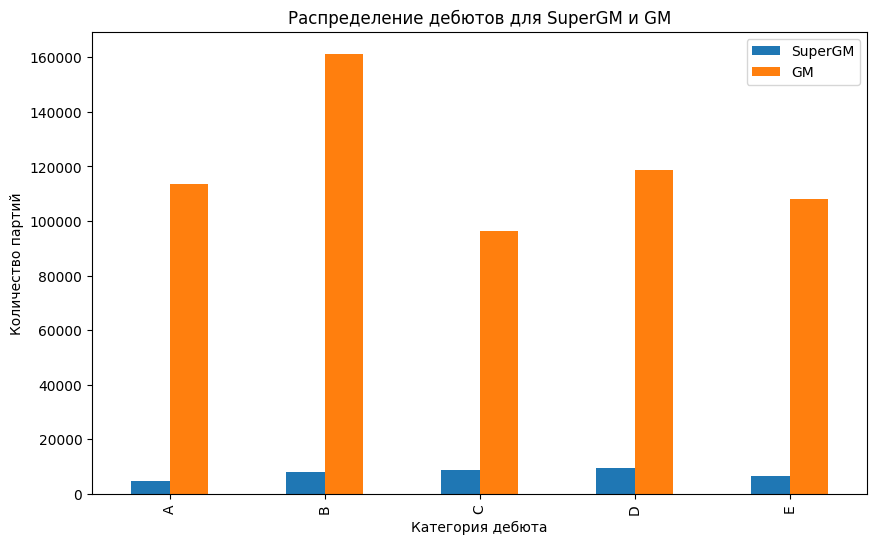

In [227]:
opening_table.plot(kind='bar', figsize=(10, 6), title='Распределение дебютов для SuperGM и GM')
plt.xlabel('Категория дебюта')
plt.ylabel('Количество партий')
plt.show()

In [228]:
observed_openings = opening_table.to_numpy()
chi2_result_openings = chi2_contingency(observed_openings)

print("Результаты теста  для предпочтений дебютов:")
print(repr(chi2_result_openings))

Результаты теста  для предпочтений дебютов:

        Chi-squared Contingency Test.
        H0: Results are independent of rating difference sign
        H1: Results depend on rating difference sign
        Statistics value: 2947.2239934685467. Critical value: 9.487729036781154
        P-value: 0.0,
        Verdict: Отвергаем H0 при уровне значимости 0.05
        


**Заключение**: Мы проверили, есть ли разница в предпочтениях дебютов между гроссмейстерами и супергроссмейстерами. Результаты теста
X^2 показали, что разница действительно существует. Распределение категорий дебютов (A, B, C, D, E) значительно отличается у игроков разного уровня (p-value = 0.0, гипотеза о независимости отвергнута).

Теперь проверьте влияет ли выбор между открытым и закрытым началом:

### Подготовка данных:
Используем только партии уровня супергроссмейстеров ($ \text{elo_average} \geq 2650 $).
Отбираем партии с дебютами категории $ C $ (открытые варианты) и $ D $ (закрытые/полузакрытые варианты).
Формируем таблицу частот для результатов партий ($ 1-0 $, $ 0-1 $, $ 1/2-1/2 $) по этим дебютам.

### Формулировка гипотез:
**Нулевая гипотеза (H_0):** Выбор между открытым C и закрытым D началом не влияет на распределение исходов партии.

H_0: Распределение исходов одинаково для дебютов C и D.

**Альтернативная гипотеза (H_1):** Выбор между открытым C и закрытым D началом влияет на распределение исходов партии.

H_1: Распределение исходов отличается для дебютов C и D.


In [229]:
supergm_games = games_df[games_df['elo_average'] > 2650]
cd_games = supergm_games[supergm_games['opening'].isin(['C', 'D'])]
cd_table = pd.crosstab(cd_games['opening'], cd_games['result'])

print("Таблица исходов для дебютов C и D:")
print(cd_table)

Таблица исходов для дебютов C и D:
result    0-1   1-0  1/2-1/2
opening                     
C        2258  3904     7309
D        2498  3927     7912


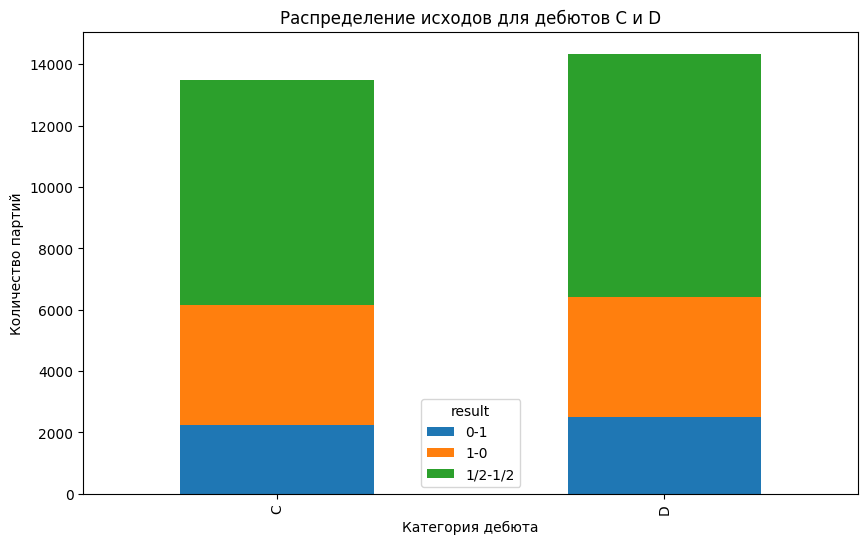

In [230]:
cd_table.plot(kind='bar', stacked=True, figsize=(10, 6), title='Распределение исходов для дебютов C и D')
plt.xlabel('Категория дебюта')
plt.ylabel('Количество партий')
plt.show()

In [231]:
observed_cd = cd_table.to_numpy()
chi2_result_cd = chi2_contingency(observed_cd)

print("Результаты теста X^2 для дебютов C и D:")
print(repr(chi2_result_cd))

Результаты теста X^2 для дебютов C и D:

        Chi-squared Contingency Test.
        H0: Results are independent of rating difference sign
        H1: Results depend on rating difference sign
        Statistics value: 9.106968969730673. Critical value: 5.991464547107979
        P-value: 0.010530447197229509,
        Verdict: Отвергаем H0 при уровне значимости 0.05
        


Что изменится если брать уровень значимости 0.01? А если брать уровень значимости 0.1? Дайте ответы на эти вопросы и напишите интерпретацию полученных результатов.

На уровне значимости 0.01:

Критическое значение на уровне 0.01 выше, чем при 0.05, так как мы ставим более строгие условия.
P-value (0.0105) больше уровня значимости 0.01. Поэтому на уровне 0.01 мы не можем отвергнуть нулевую гипотезу ($H_0$). Вывод: данные не дают достаточно оснований для утверждения, что выбор дебюта влияет на исход партии.

На уровне значимости 0.1:

Критическое значение на уровне 0.1 ниже, чем при 0.05, так как мы ставим менее строгие условия.
P-value (0.0105) меньше уровня значимости 0.1. Поэтому на уровне 0.1 мы отвергаем нулевую гипотезу ($H_0$). Вывод: распределение исходов зависит от выбора дебюта с большей уверенностью.

**Заключение**: Мы провели анализ, чтобы выяснить, влияет ли выбор между открытым ($C$) и закрытым ($D$) началом на распределение исходов партий уровня супергроссмейстеров. Тест $X^2$ показал, что на уровне значимости 0.05 распределение исходов действительно зависит от категории дебюта. Однако, при более строгом уровне значимости (0.01) данных оказалось недостаточно, чтобы сделать такой вывод. При менее строгом уровне (0.1) влияние дебюта на исход партии становится еще более явным.

## Задача 4. Исследование длин партий в разных формах временного контроля (10 баллов)

Попробуйте разобраться в том, какому распределению следуют длительности партий в формате рапид. Выберете несколько распределений и попробуйте оценить их параметры. Постройте гистограммы на которых изображено распределение длительности партий и теоретические плотности распределений с оценёнными параметрами.

Для оценки параметров распределений можно использовать метод ``fit()`` класса ``scipy.rv_continious()``.

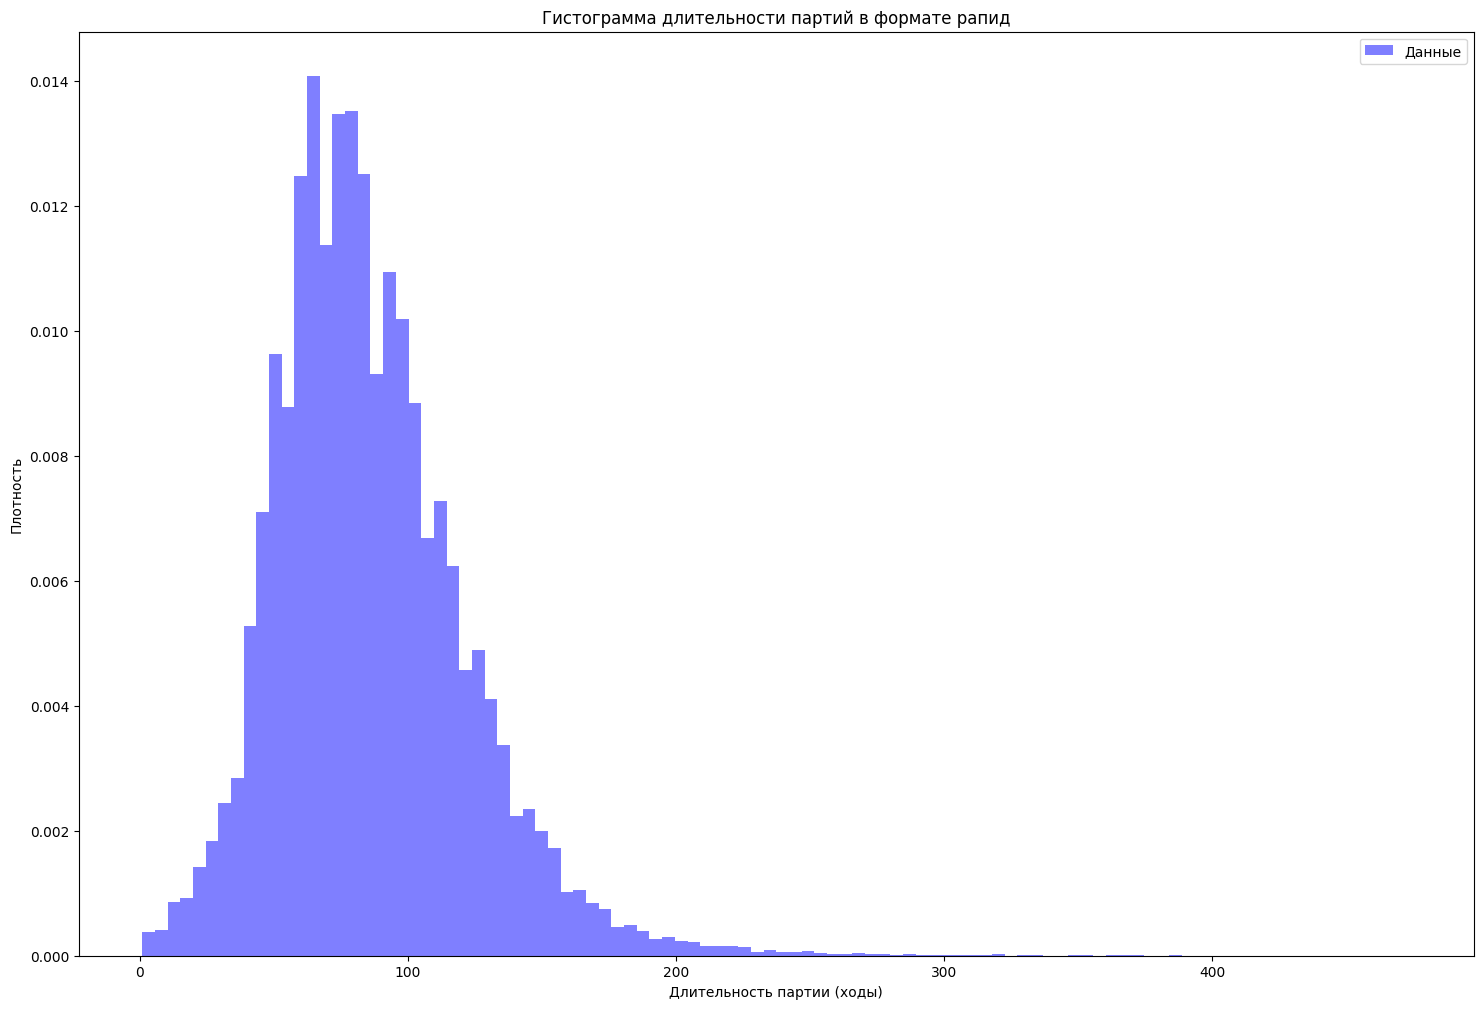

In [304]:
from scipy.stats import gamma, lognorm, exponnorm, invgauss, invgamma, rayleigh, maxwell
from scipy.stats import kstest

rapid = games_df[games_df['control'] == 'rapid']

plt.figure(figsize=(18, 12))
plt.hist(rapid['length'], bins=100, density=True, alpha=0.5, color='blue', label='Данные')
plt.xlabel('Длительность партии (ходы)')
plt.ylabel('Плотность')
plt.title('Гистограмма длительности партий в формате рапид')
plt.legend()
plt.show()

In [305]:
distributions = [gamma, lognorm, exponnorm, invgauss, rayleigh, maxwell]

fitted_params = {}
for dist in distributions:
    params = dist.fit(rapid['length'])
    fitted_params[dist.name] = params

for name, params in fitted_params.items():
    print(f"{name}: {params}")

gamma: (33.43447568732579, -109.08516609226947, 5.8231794783581545)
lognorm: (0.23507696508816533, -60.76451045535794, 142.7043567109848)
exponnorm: (1.2907336132144143, 57.90953503116758, 21.736233845308945)
invgauss: (0.06216288536443604, -57.23672504558483, 2302.4777626469267)
rayleigh: (0.8318795890336145, 65.2396661298972)
maxwell: (-0.5343737709817655, 53.99669785386235)


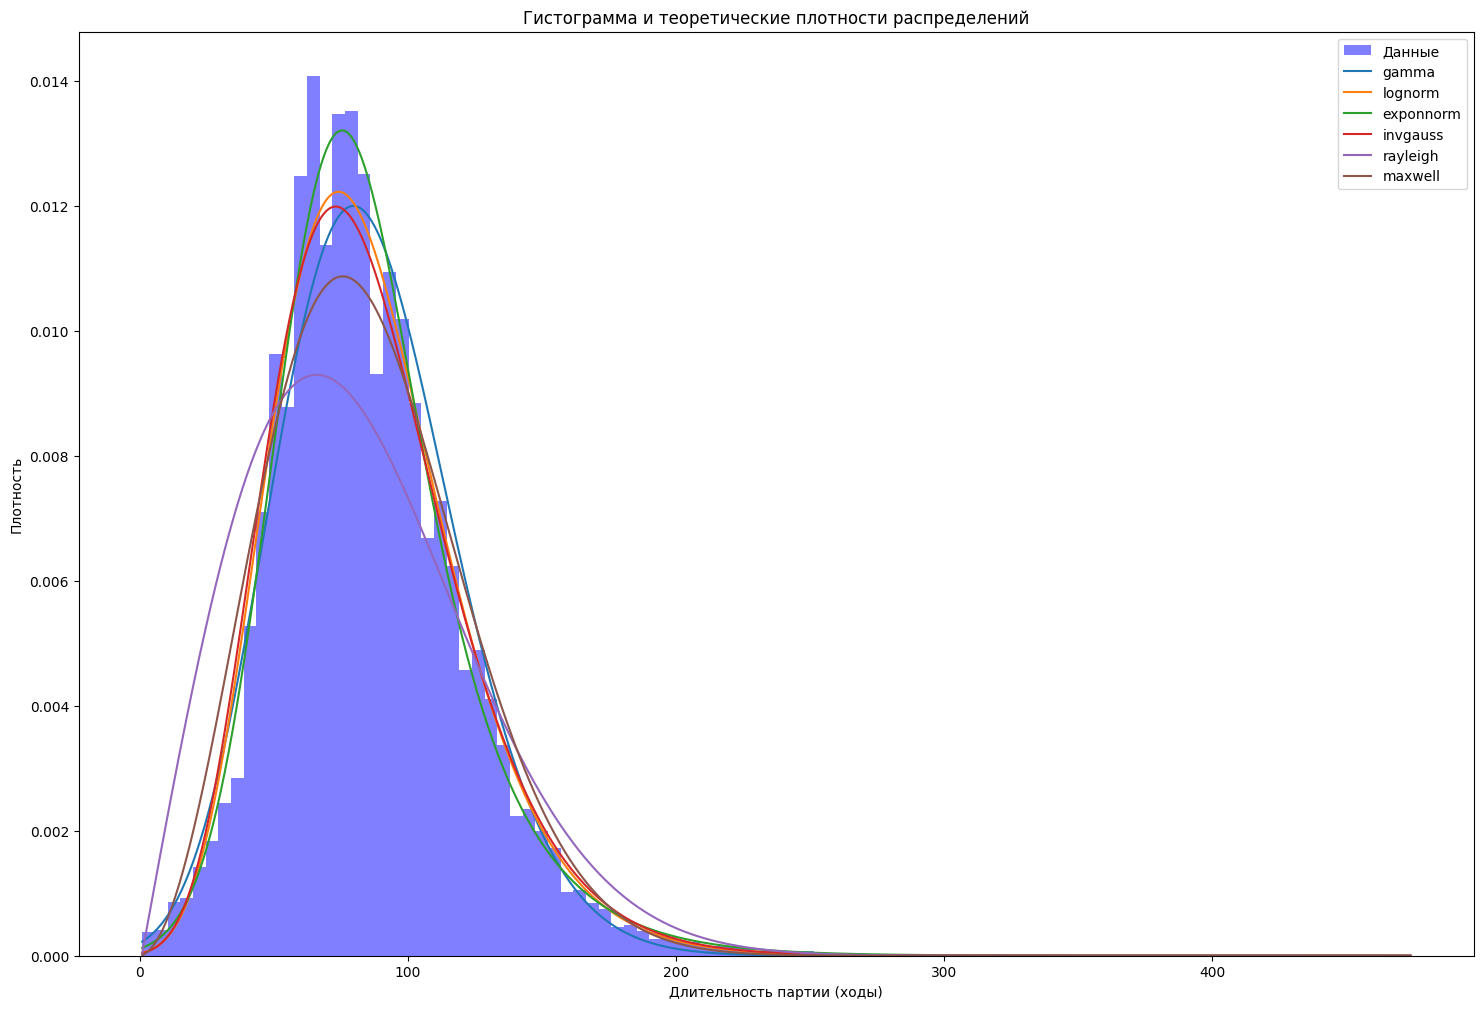

In [306]:
x = np.linspace(rapid['length'].min(), rapid['length'].max(), 1000)
plt.figure(figsize=(18, 12))
plt.hist(rapid['length'], bins=100, density=True, alpha=0.5, color='blue', label='Данные')

for dist in distributions:
    params = fitted_params[dist.name]
    pdf = dist.pdf(x, *params)
    plt.plot(x, pdf, label=f'{dist.name}')

plt.xlabel('Длительность партии (ходы)')
plt.ylabel('Плотность')
plt.title('Гистограмма и теоретические плотности распределений')
plt.legend()
plt.show()

Выберите три наиболее на ваш взгляд подходящих распределения и постройте для них Q-Q график. Подробнее про Q-Q графики можно прочитать [здесь](https://habr.com/ru/articles/578754/) (обратите внимание, что в статье делается упор на Q-Q графики относительно нормального распределения --- вам же нужно построить графики относительно распределений, параметры которых вы оценили).

In [235]:
def qqplot(data : ArrayLike, distribution: stats.rv_continuous,  quantiles : int,  ax : plt.axis) -> plt.axis:
    """
        Plots Q-Q plot agains theoretical distribution.

        Parameters
        ----------
        data : ArrayLike
            sample data
        distribution: stats.rv_continuous
            theoretical distribution agains which quantiles will be plotted
        quantiles: int
            number of quantiles (must be less than size of the data)
        ax: plt.axis
            PyPlot Axis object, on which QQ-plot should be plotted

        Returns
        -------
        ax: plt.axis
            PyPlot Axis object with QQ-plot
    """

    theoretical_quantiles = np.linspace(0, 1, len(data))
    theoretical = distribution.ppf(theoretical_quantiles, *params)
    empirical = np.sort(data)

    ax.scatter(theoretical, empirical, label='Данные', alpha=0.7)
    ax.plot(theoretical, theoretical, color='red', label='Идеальное соответствие')
    ax.set_xlabel('Теоретические квантили')
    ax.set_ylabel('Эмпирические квантили')
    ax.legend()
    return ax

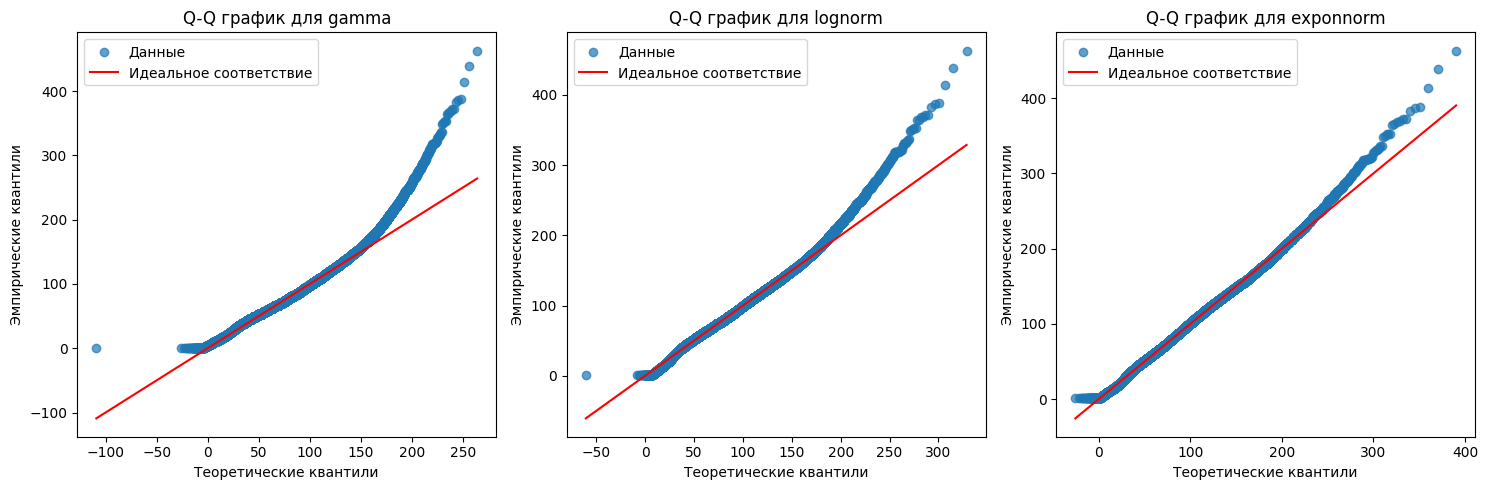

In [237]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
selected_distributions = [gamma, lognorm, exponnorm]

for ax, dist in zip(axs, selected_distributions):
    params = fitted_params[dist.name]
    qqplot(rapid['length'], dist, params, ax)
    ax.set_title(f"Q-Q график для {dist.name}")

plt.tight_layout()
plt.show()

 На основе всего выше сделанного выберете одно распределение, которое вам кажется наиболее подходящим. После того как вы выбрали распределение $F_0$, проверьте соответствующую гипотезу согласия. Конкретнее, проверьте гипотезу
$$
H_0: X_1,..,X_n \sim F_0
$$
против альтернативы
$$
H_A: X_1,..,X_n \nsim F_0
$$


Такую гипотезу часто проверяют с помощью статистики критерия Колмогорова-Смирнова:
$$
D = \sqrt{n} \sup_x \vert F_{0} - \hat{F}(x)\vert,
$$
где $\hat{F}$ -- эмпирическая функция распределения, которая задётся как
$$
\hat{F}(x) = \frac{1}{n}\sum_{i=1}^n \mathbb{1}(X_i \leq x).
$$
Выражение $1(условие)$ равно $1$, если условие верно и $0$ в противном случае -- так выше считается количество элементов выборки $\leq x$. Статистика $D$ при больших $n$ (сотен уже достаточно) имеет распределение Колмогорова, так что можно построить критерий для проверки. Чтобы упростить техническую часть с подсчётом $D$, воспользуйтесь готовым тестом из пакета scipy.stats.

In [307]:
chosen_distribution = exponnorm
params = fitted_params['exponnorm']
statistic, p_value = kstest(rapid['length'], chosen_distribution.cdf, args=params)

print("Критерий Колмогорова-Смирнова для проверки гипотезы согласия:")
print(f"Статистика: {statistic}")
print(f"P-значение: {p_value}")

if p_value < 0.05:
    print("Отвергаем нулевую гипотезу: данные не соответствуют выбранному распределению.")
else:
    print("Не отвергаем нулевую гипотезу: данные могут следовать выбранному распределению.")

Критерий Колмогорова-Смирнова для проверки гипотезы согласия:
Статистика: 0.016403099778992902
P-значение: 1.3085931881751849e-24
Отвергаем нулевую гипотезу: данные не соответствуют выбранному распределению.


Объясните, почему получилось такое значение несмотря на то, что подобранное вами распределение достаточно неплохо описывает данные? Подумайте, можно ли как-то изменить процедуру проверки для того чтобы можно было воспользоваться этим тестом? Обратите внимание на две вещи:
1. Как считается статистка критерия КС и почему для наших данных эмпирическая функция распределения никогда не будет сходится к функции распределения выбранного вами распределения? Как можно сделать дискретные данные  не-дискретными?
2.  Обратите внимание на выброс в данных в районе где достигается значение статистики критерия (statistic location). С чем может быть связан этот выброс и как можно было бы его устранить?

Опишите и реализуйте измененную процедуру.

Критерий Колмогорова-Смирнова очень чувствителен даже к небольшим отклонениям между фактическим (эмпирическим) распределением данных и теоретическим распределением. Даже если визуально распределение кажется подходящим, при большом объёме данных (например, тысячах партий) тест может отклонить гипотезу, поскольку он выявляет мелкие локальные расхождения. Проблема также в том, что данные в выборке дискретны (например, количество ходов целое), а теоретическое распределение непрерывное. Это приводит к тому, что фактическое распределение выглядит ступенчатым, а теоретическое гладким, что увеличивает разницу между ними. Кроме того, выбросы в данных (например, очень длинные или короткие партии) могут ещё сильнее увеличивать расхождения, даже если основное распределение хорошо соответствует данным.

In [322]:
smoothed_data = rapid['length'] + np.random.normal(0, 20, size=rapid['length'].shape)
lower_bound  = np.percentile(smoothed_data, 1)
upper_bound = np.percentile(smoothed_data, 99)
dif = upper_bound - lower_bound
l_bound = lower_bound - 1.5 * dif
up_bound = upper_bound + 1.5 * dif
rapid_length_clean  = smoothed_data[(smoothed_data >= l_bound) & (smoothed_data <= up_bound)]
params = exponnorm.fit(rapid_length_clean)

statistic, p_value = stats.kstest(rapid_length_clean , 'exponnorm', args=params)
print("Критерий Колмогорова-Смирнова после обработки данных:")
print(f"Статистика: {statistic}")
print(f"P-значение: {p_value}")

if p_value < 0.05:
    print("Отвергаем нулевую гипотезу: данные не соответствуют выбранному распределению.")
else:
    print("Не отвергаем нулевую гипотезу: данные могут следовать выбранному распределению.")

Критерий Колмогорова-Смирнова после обработки данных:
Статистика: 0.0025210421833792296
P-значение: 0.5257170065735908
Не отвергаем нулевую гипотезу: данные могут следовать выбранному распределению.
